# 1 import library

In [1]:
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import MaxNLocator, AutoMinorLocator, FuncFormatter
from matplotlib.figure import SubplotParams
import functools
import os
import math
import numpy as np
import pandas as pd
import mdtraj as md
import seaborn as sns
from tqdm import tqdm
from numpy.ma import mean
from rdkit import Chem
from scipy.stats import gaussian_kde
from rdkit.Chem.rdMolDescriptors import GetMorganFingerprintAsBitVect
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE

from typing import (
    Any,
    Tuple,
    Optional,
    Dict,
    List
)


# 2 Parameter Setting

## 2.1 parameter setting

In [2]:
class superArges:
    def __init__(
        self,
        figsize: Tuple = (10, 8),
        dpi: int = 600,
        nrows: int = 1,
        ncols: int = 1,
        title: str = None,
        xlabels: List = None,
        ylabels: List = None,
        labels: List = None,
        fontsize: int = 12,
        colors: List = None,
        alpha: float = 1.0,

        loc: int = 8, 
        ncol: int = 1, 

        font: FontProperties = None,

        save_dir: str = "./",
        save_path: str = "output.png"
    ):
        self.global_xlim = (1, 260)  
        self.xtick_step = 50      
        fig_number = nrows * ncols
        if not xlabels: xlabels = [None] * fig_number
        elif isinstance(xlabels, str): xlabels = [xlabels] * fig_number
        elif isinstance(xlabels, list) and len(xlabels) == 1: xlabels = xlabels * fig_number
        if not ylabels: ylabels = [None] * fig_number
        elif isinstance(ylabels, str): ylabels = [ylabels] * fig_number
        elif isinstance(ylabels, list) and len(ylabels) == 1: ylabels = ylabels * fig_number
        if not labels: labels = [None] * fig_number
        elif isinstance(labels, str): labels = [labels] * fig_number
        elif isinstance(labels, list) and len(labels) == 1: labels = labels * fig_number
        self.figsize = figsize
        self.dpi = dpi
        self.nrows = nrows
        self.ncols = ncols
        self.xlabels = xlabels
        self.ylabels = ylabels
        self.labels = labels
        self.colors = colors
        self.fontsize = fontsize

        self.loc = loc
        self.ncol = ncol

        self.font = font

        self.save_dir = save_dir
        self.save_path = save_path

# 2.2 argument design

In [3]:
data_path_ = r"../jupyter_draw/generated.sdf"
save_dir_ = r"../jupyter_draw/imgs/rrr"
save_path_ = r"../jupyter_draw/imgs/rrr/RRR.png"
if not os.path.exists(save_dir_): os.makedirs(save_dir_)

figsize_ = (12, 8)
dpi_ = 600
nrows_ = 1
ncols_ = 1
title_ = 'Enavogliflozin (ENV)'
xlabels_ = 'Residue'
ylabels_ = 'Energy Contribution (kcal/mol)'
labels_ = None
fontsize_ = 32
colors_ = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'pink', 'gray', 'orange', 'purple', 'brown', 'olive', 'teal']
alpha_ = 1
arges = superArges(
    figsize=figsize_, dpi=dpi_, nrows=nrows_, ncols=ncols_,
    title=title_, xlabels=xlabels_, ylabels=ylabels_, labels=labels_, 
    fontsize=fontsize_, colors=colors_, alpha=alpha_,
    save_dir=save_dir_, save_path=save_path_,
)

COLOR = "#000000"
n_clusters = 25
custom_labels_ = []
for i in range(n_clusters):
    custom_labels_.append(f'{i+1}')

# 3  Generic Module

## 3.1 Object Module

In [4]:
class DiagramObjects:
    def __init__(
            self,
            data: Any = None,

            figsize: Tuple[float, float]=(12, 8),
            dpi: int = 600,
            facecolor: str = 'white',
            edgecolor: str = 'white',
            linewidth: float = 0.2,
            frameon: bool = True,
            subplotpars: Optional[SubplotParams] = None,
            tight_layout: Optional[bool] = True,
            # constrained_layout: Optional[bool] = False,
            layout: Optional[str] = None,

            fontsize: int = arges.fontsize,
            title: str = None,
            xlabels: str = None,
            ylabels: str = None,

            figure: Any = None,
            nrows: int = 1,
            ncols: int = 1,
            top: Optional[float] = None,
            bottom: Optional[float] = None,
            left: Optional[float] = None,
            right: Optional[float] = None,
            wspace: Optional[float] = None,
            hspace: Optional[float] = None,
            width_ratios: Any = None,
            height_ratios: Any = None,
            polar: bool = False,
            projection: str = None,
            sharex: Any = None,
            sharey: Any = None,
            labels: List = None,

            font: FontProperties = None

    ):
        if not labels: labels = [None] * nrows * ncols
        if not xlabels: xlabels = [None] * nrows * ncols
        elif isinstance(xlabels, str): xlabels = [xlabels] * nrows * ncols
        elif isinstance(xlabels, list) and len(xlabels) == 1: xlabels = xlabels * nrows * ncols
        if not ylabels: ylabels = [None] * nrows * ncols
        elif isinstance(ylabels, str): ylabels = [ylabels] * nrows * ncols
        elif isinstance(ylabels, list) and len(ylabels) == 1: ylabels = ylabels * nrows * ncols
            
        self.fontsize = fontsize
        self.plt = plt
        self.figure = self.plt.figure(
            figsize=figsize,
            dpi=dpi,
            facecolor=facecolor,
            edgecolor=edgecolor,
            linewidth=linewidth,
            frameon=frameon,
            subplotpars=subplotpars,
            tight_layout=tight_layout,
            # constrained_layout=constrained_layout,
            layout=layout,
        )
        self.gridspec = GridSpec(
            nrows=nrows,
            ncols=ncols,
            figure=self.figure,
            top=top,
            bottom=bottom,
            left=left,
            right=right,
            wspace=wspace,
            hspace=hspace,
            width_ratios=width_ratios,
            height_ratios=height_ratios,
        )
        self.ax = {}
        ax_ = None
        for i in range(nrows):
            sharex = ax_ if sharex else None
            sharey = ax_ if sharey else None
            for j in range(ncols):
                self.ax[(i, j)] = self.figure.add_subplot(
                    self.gridspec[i, j],
                    polar=polar,
                    projection=projection,
                    sharex=sharex,
                    sharey=sharey,
                    label=labels[i],
                    facecolor=facecolor,
                )
        self.set_font_sizes(title=title, xlabels=xlabels, ylabels=ylabels, font=font)

    def set_font_sizes(self, title: str = None, xlabels: List = None, ylabels: List = None, font: FontProperties = None):
        if not xlabels: xlabels = [None] * len(self.ax.items())
        if not ylabels: ylabels = [None] * len(self.ax.items())

        self.figure.suptitle(title, fontsize=self.fontsize-2, fontproperties=font)
        
        index_number = 0
        for (i, j), ax in self.ax.items():
            ax.set_xlabel(xlabels[index_number], fontsize=self.fontsize-4, fontproperties=font)
            ax.set_ylabel(ylabels[index_number], fontsize=self.fontsize-4, fontproperties=font)

            ax.tick_params(axis='x', labelsize=self.fontsize)
            ax.tick_params(axis='y', labelsize=self.fontsize)
            
            if index_number < len(self.ax.items())-1: index_number += 1

    def bind_subplots(self, share_x=False, share_y=True):
        if len(self.ax) > 0:
            first_ax = list(self.ax.values())[0]
            for ax in list(self.ax.values())[1:]:
                if share_x:
                    ax.sharex(first_ax)
                if share_y:
                    ax.sharey(first_ax)

## 3.2 Functional Module

In [5]:
def load_style(font_path: str = r"E:\Kinase_mapping\jupyter_draw\Times New Roman.ttf"):
    try:
        plt.style.use("chartlab.mplstyle")
    except:
        pass
    font = FontProperties(fname=font_path)
    plt.rcParams['font.sans-serif'] = [font.get_name()]  
    plt.rcParams["axes.unicode_minus"] = False
    plt.rcParams['text.color'] = COLOR  
    plt.rcParams['axes.labelcolor'] = COLOR  
    plt.rcParams['xtick.color'] = COLOR  
    plt.rcParams['ytick.color'] = COLOR
    return font


def get_ticks(min_tick, max_tick, tick_num: int = 10):
    intervals = [
        0.00001, 0.00002, 0.00005,
        0.0001, 0.0002, 0.0005, 
        0.001, 0.002, 0.005, 
        0.01, 0.02, 0.05, 
        0.1, 0.2, 0.5, 
        1, 2, 5, 
        10, 20, 50, 
        100, 200, 500, 
        1000, 2000, 5000, 
        10000, 20000, 50000,
        100000, 200000, 500000
    ]
    mm_tick = abs(max_tick - min_tick)
    for interval in intervals:
        if tick_num-2 <= (mm_tick+interval)/interval <= tick_num+2: return np.arange(min_tick, max_tick+interval, interval)
    else: return np.linspace(min_tick, max_tick, tick_num)

    
arges.font = load_style()

# 4 Dedicated Section

# 4.1 tools

In [6]:
def kde(
        ax,
        data,
        title: str = None,
        xlabel: str = 'Density',
        ylabel: str = None,
        color: str = 'r',
        off_axis: bool = True
):
    if title: ax.set_title(title)
    if xlabel: ax.set_xlabel(xlabel)
    if ylabel: ax.set_ylabel(ylabel)

    _kde = gaussian_kde(data)
    density = _kde(data)
    # ax.plot(density, data, color='r', linestyle='-', linewidth=0.5, label='KDE')

    sns.kdeplot(y=data, color=color, fill=True, ax=ax)
    if off_axis:ax.axis('off')


def list_to_tuple_list(lst):
    if not lst:
        return []
    tuple_list = []
    start = lst[0]
    for i in range(1, len(lst)):
        if lst[i] != lst[i - 1] + 1:
            tuple_list.append((start, lst[i - 1]))
            start = lst[i]
    tuple_list.append((start, lst[-1]))
    return tuple_list

def comput_shadow(dt_data, dz_data, sj_data):
    yellow_list = []
    red_list = []
    for index, item in enumerate(sj_data):
        if dt_data[index] < item and dz_data[index] < item:
            yellow_list.append(index)
        elif dt_data[index] > item and dz_data[index] > item:
            red_list.append(index)
    yellow_tuple_list = list_to_tuple_list(yellow_list)
    red_tuple_list = list_to_tuple_list(red_list)
    return yellow_tuple_list, red_tuple_list

# 4.2 function

In [7]:
import matplotlib.ticker as ticker
def upper_lower_bar_chart(
        ax,
        labels,
        values,
        title: str | None = 'Enavogliflozin (ENV)',
        x_label='Residue',
        y_label='Energy Contribution (kcal/mol)',
        font: FontProperties = None,
        label: str | None = None,
        color='b',
        font_size=32,
        line_width=3,
        alpha: float = 1,
):
    if not font: load_style()
    bars = ax.bar(labels, values, label=label, color=color, alpha=alpha)
    min_value = min(values)
    max_value = max(values)
    mm_value = abs(min_value) if abs(min_value) > max_value else max_value
    ax.set_ylim(-mm_value - mm_value * 0.05, mm_value + mm_value * 0.05)
    ax.axhline(y=0, color='black', linewidth=1.5, linestyle='-')
    ax.xaxis.set_ticks_position('bottom')

    ax.tick_params(axis='x', labelsize=font_size - 2)  # 设置 x 轴刻度标签的字体大小
    ax.tick_params(axis='y', labelsize=font_size - 2)  # 设置 y 轴刻度标签的字体大小

    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['right'].set_visible(True)
    ax.spines['top'].set_visible(True)

    ax.spines['bottom'].set_linewidth(w=line_width)
    ax.spines['left'].set_linewidth(w=line_width)
    ax.spines['right'].set_linewidth(w=line_width)
    ax.spines['top'].set_linewidth(w=line_width)

    if title: ax.set_title(title, fontproperties=font, fontsize=font_size)
    if x_label: ax.set_xlabel(x_label, fontproperties=font, fontsize=font_size)
    if y_label: ax.set_ylabel(y_label, fontproperties=font, fontsize=font_size)

# 5 Functional Testing

In [8]:
# data
# arges.labels

# 6 Data Processing

In [9]:
# %%capture

In [17]:
data_dir_ = "data path"
data_file_list_ = os.listdir(data_dir_)
data_csv_file_list_ = [os.path.join(data_dir_, data_file) for data_file in data_file_list_ if data_file.endswith('.xls')]

LABEL_MAPPING = {
    '对照': 'BTK/C12',
    '137': 'BTK/C137',
    '1216': 'BTK/C1216',
    '2847': 'BTK/C2847',
    '2909': 'BTK/C2909',
    '5598': 'BTK/C5598'
}
data_dict_ = {}
for data_file_ in data_csv_file_list_:
    icon_text = os.path.basename(data_file_).split('_')[0][:-5]
    file_name_ = os.path.basename(data_file_).replace('.xls', '')

    df = pd.read_excel(data_file_)
    labels_ = df.to_numpy()[:, 0]
    #values_ = df.to_numpy()[:, 7]
    values_ = df.to_numpy()[:, 1]

    data_dict_[icon_text] = {
        'labels': labels_, 
        'values': values_,
        'display_label': LABEL_MAPPING.get(icon_text, f"BTK/C{icon_text}")  
    }

colors_ = {
    '137': 'r',
    '1216':'b',
    '2847': 'g',
    '2909':'#5db4b4',
    '5598': '#FF8C00',
    '对照': '#795548',
}
ordered_keys = ['对照', '137', '1216', '2847', '2909', '5598']
ordered_keys = [k for k in ordered_keys if k in data_dict_]  

# 7 Mapping

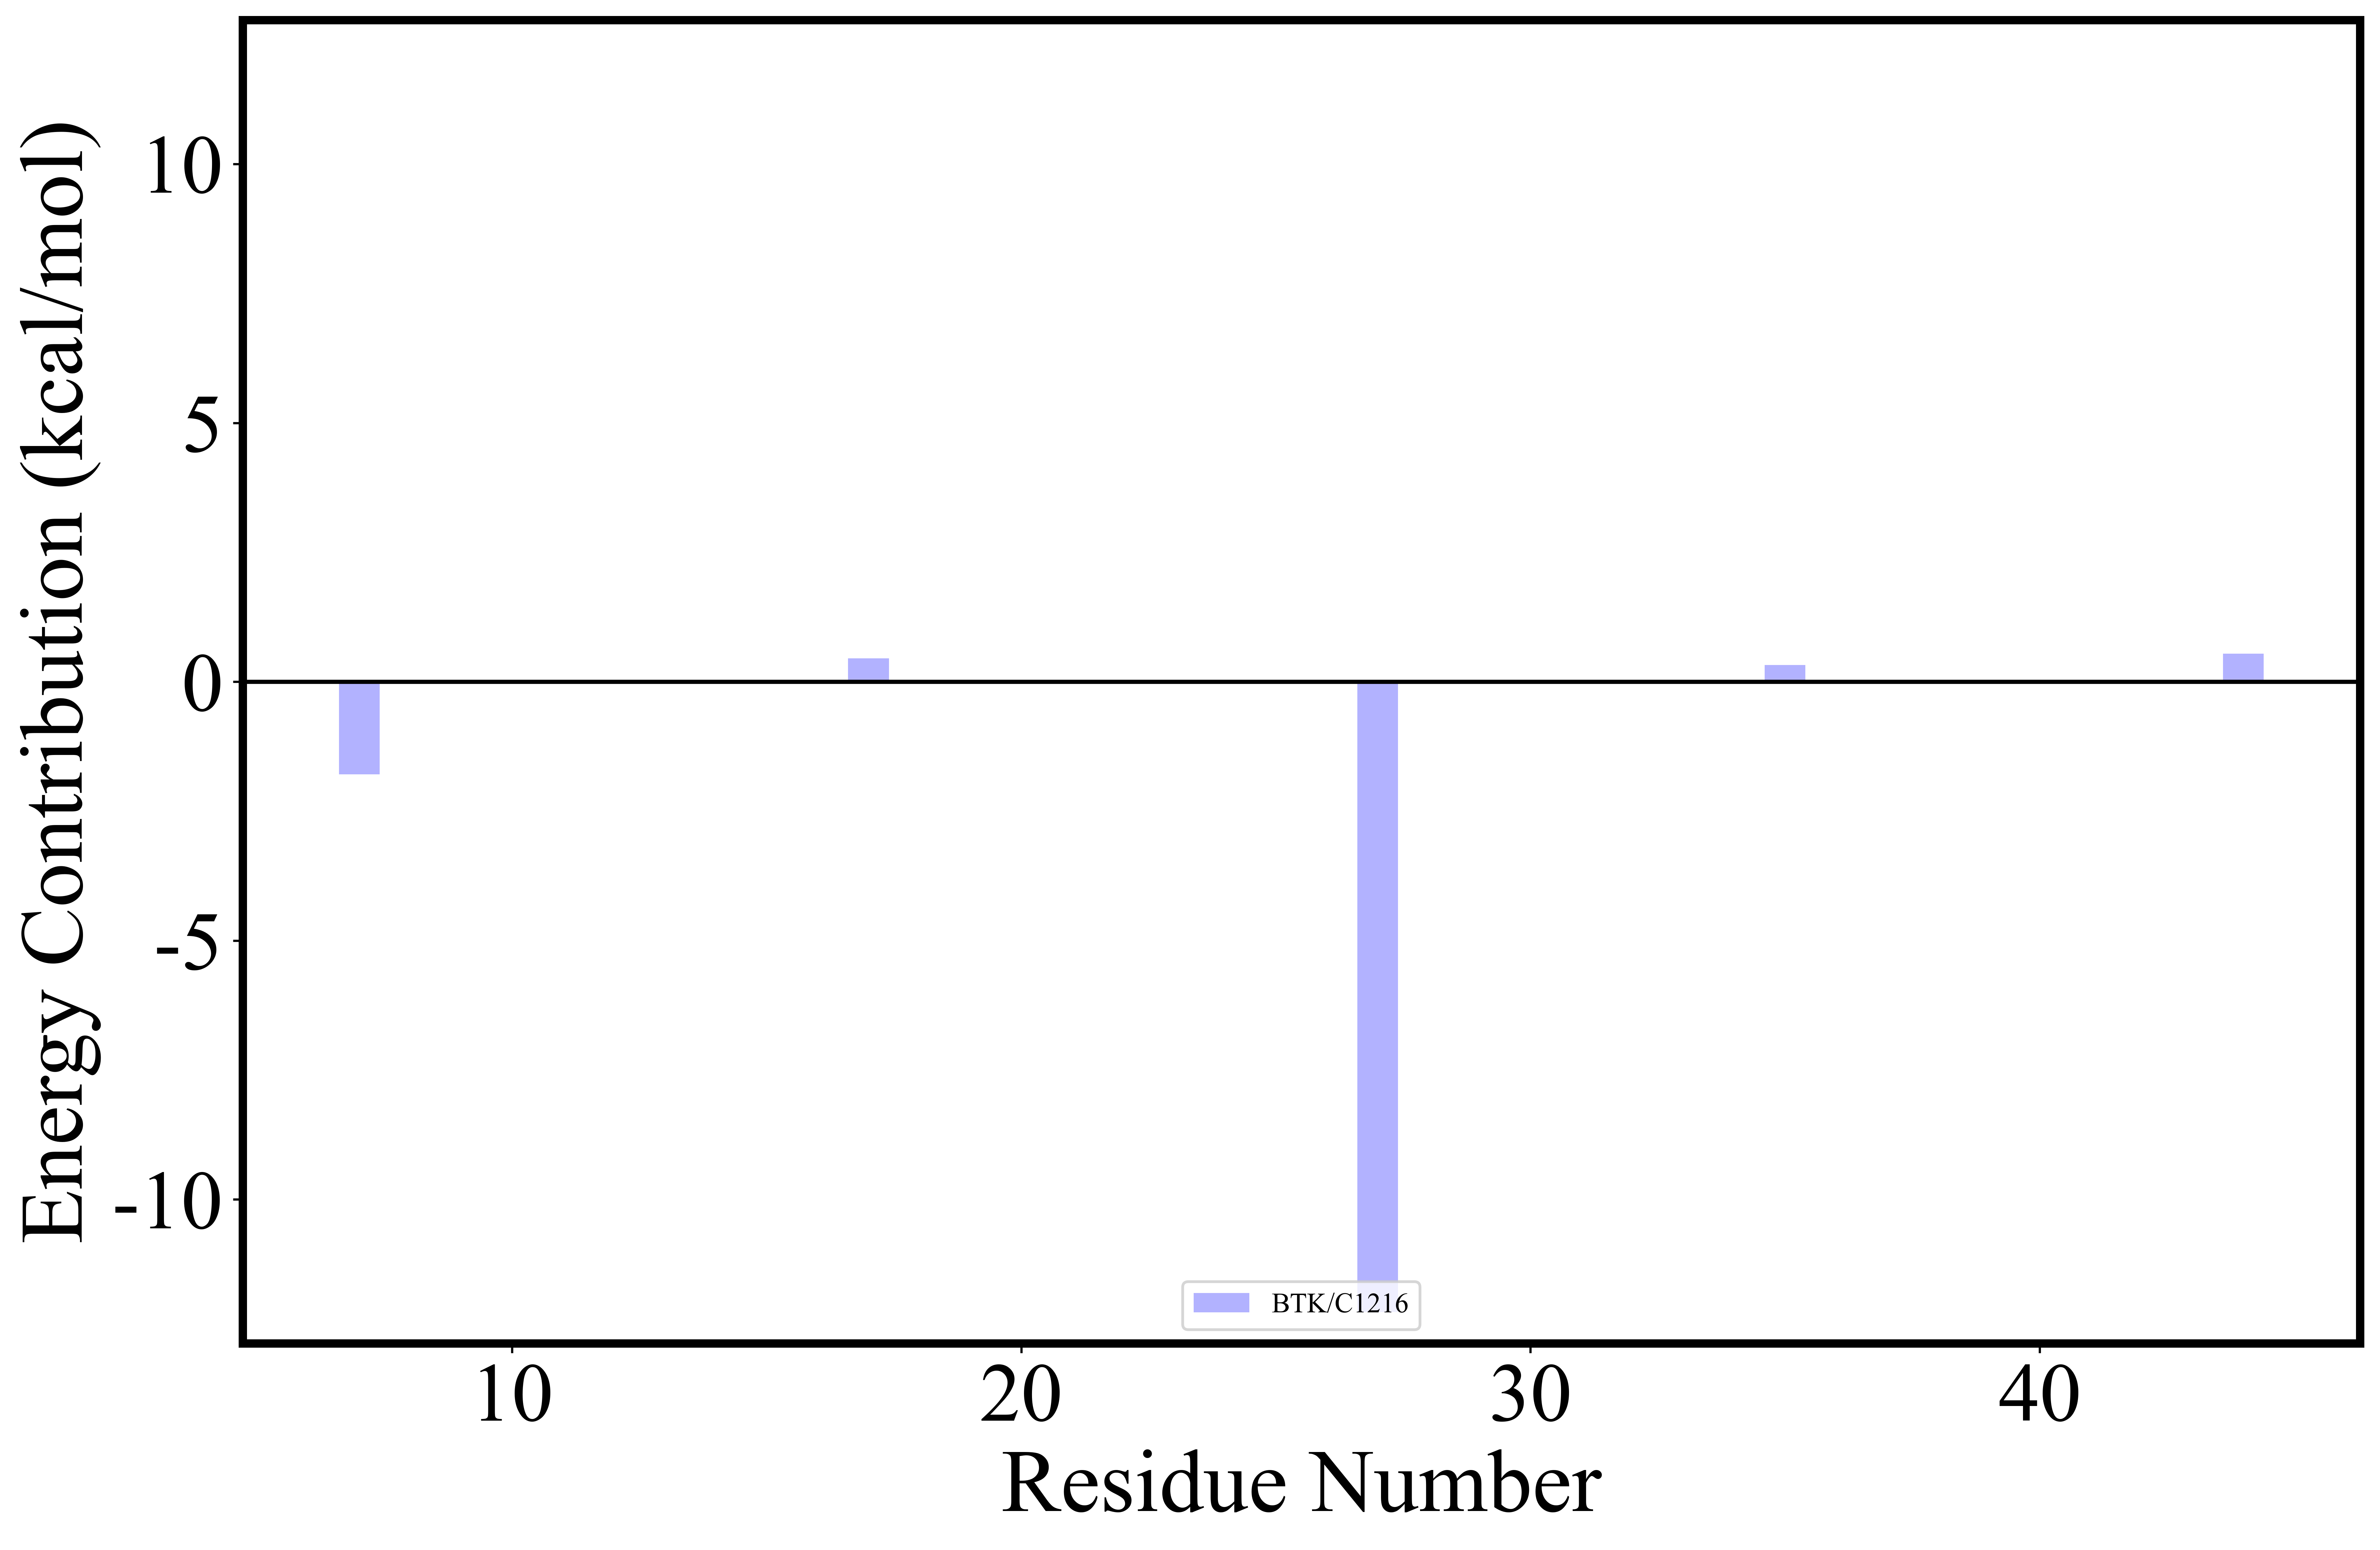

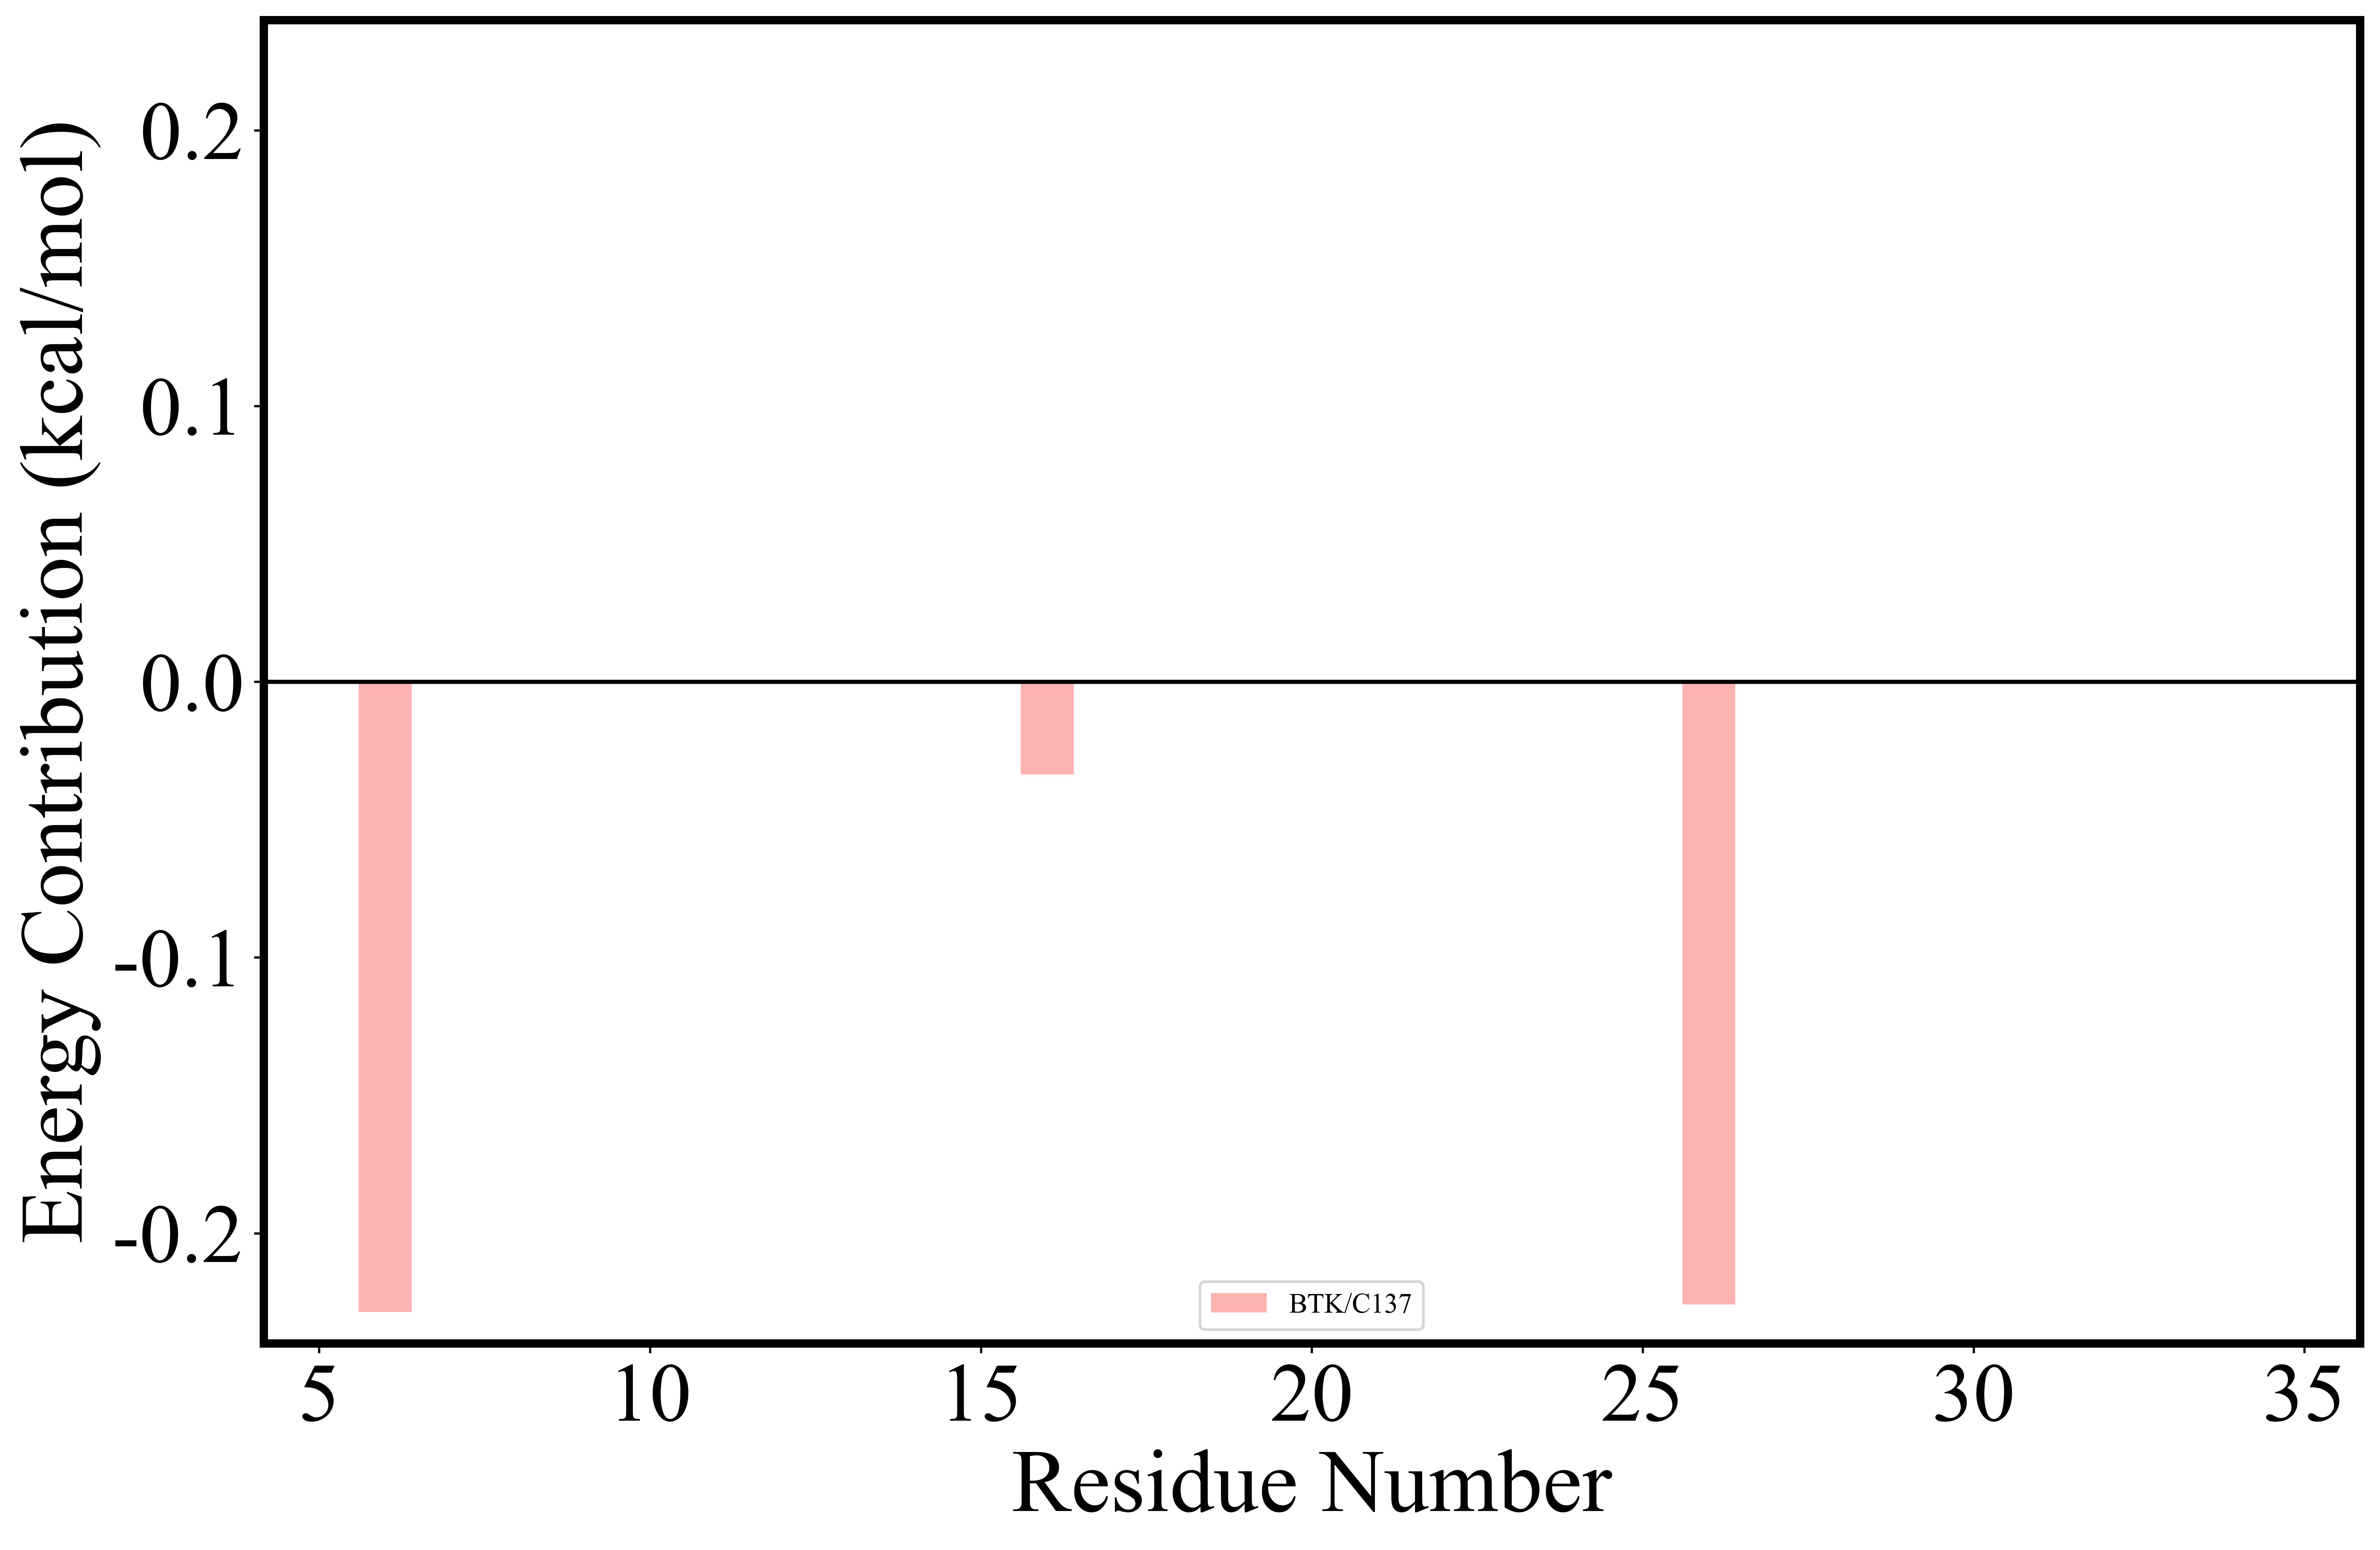

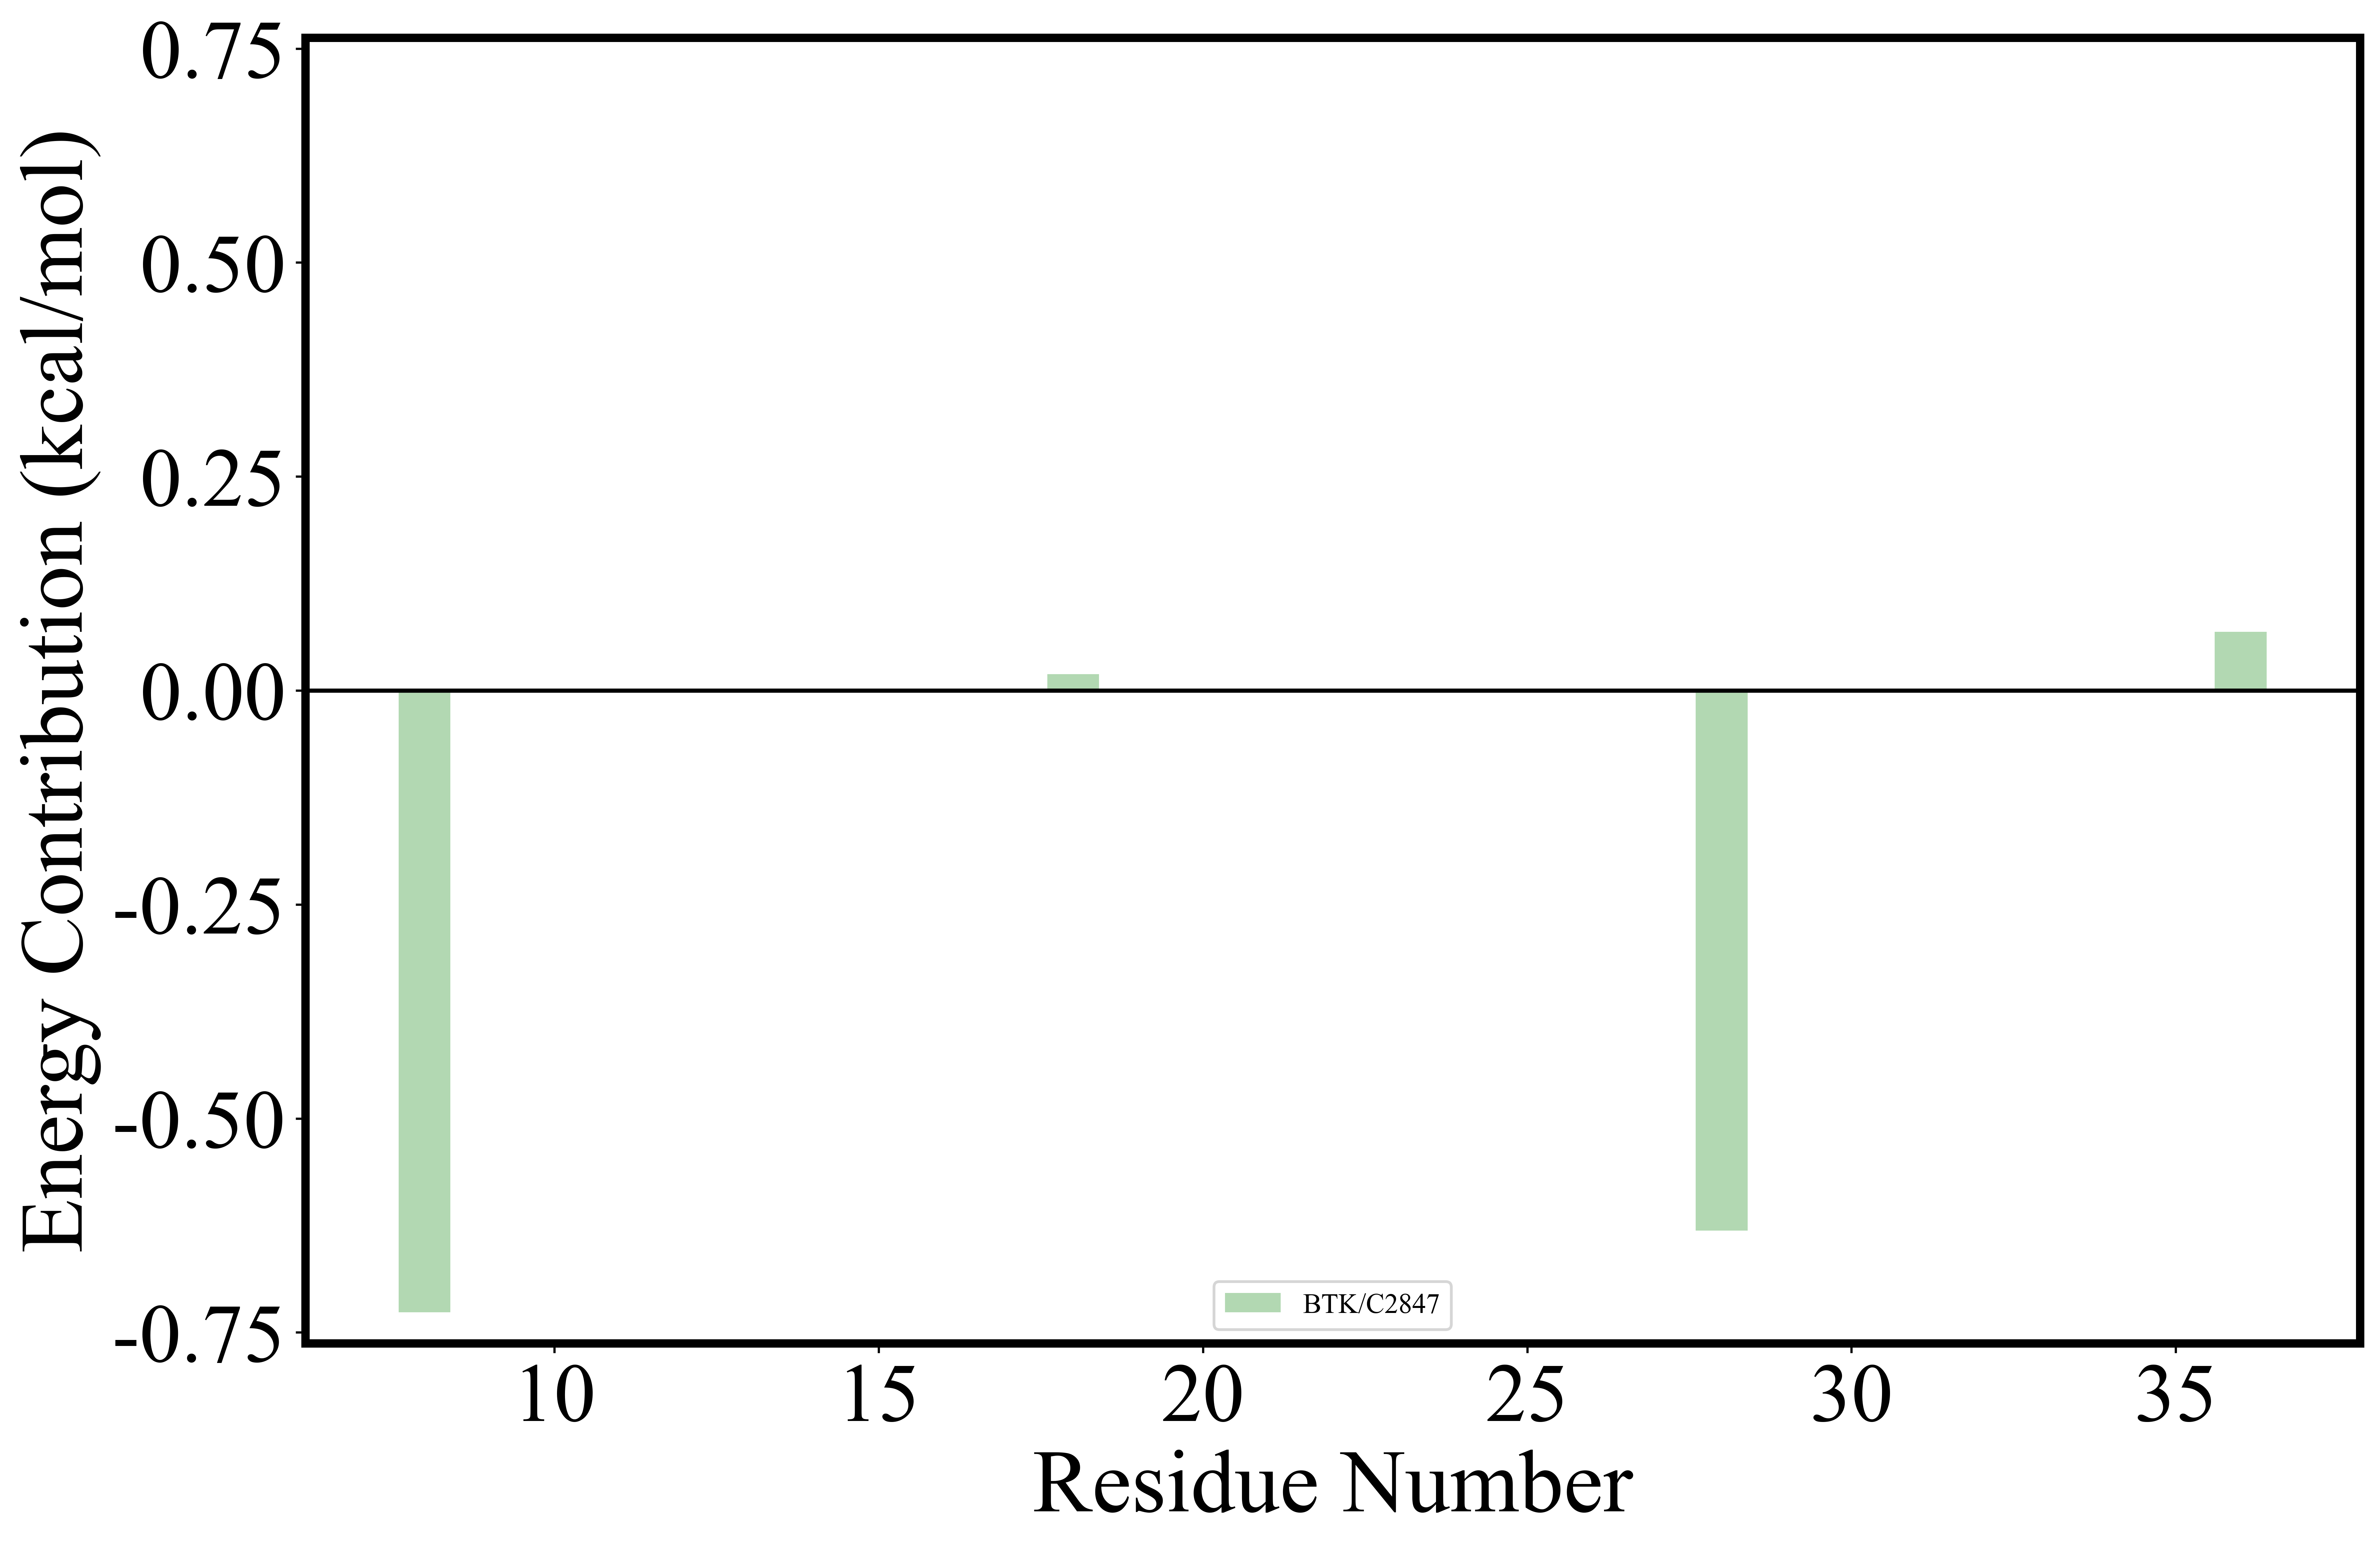

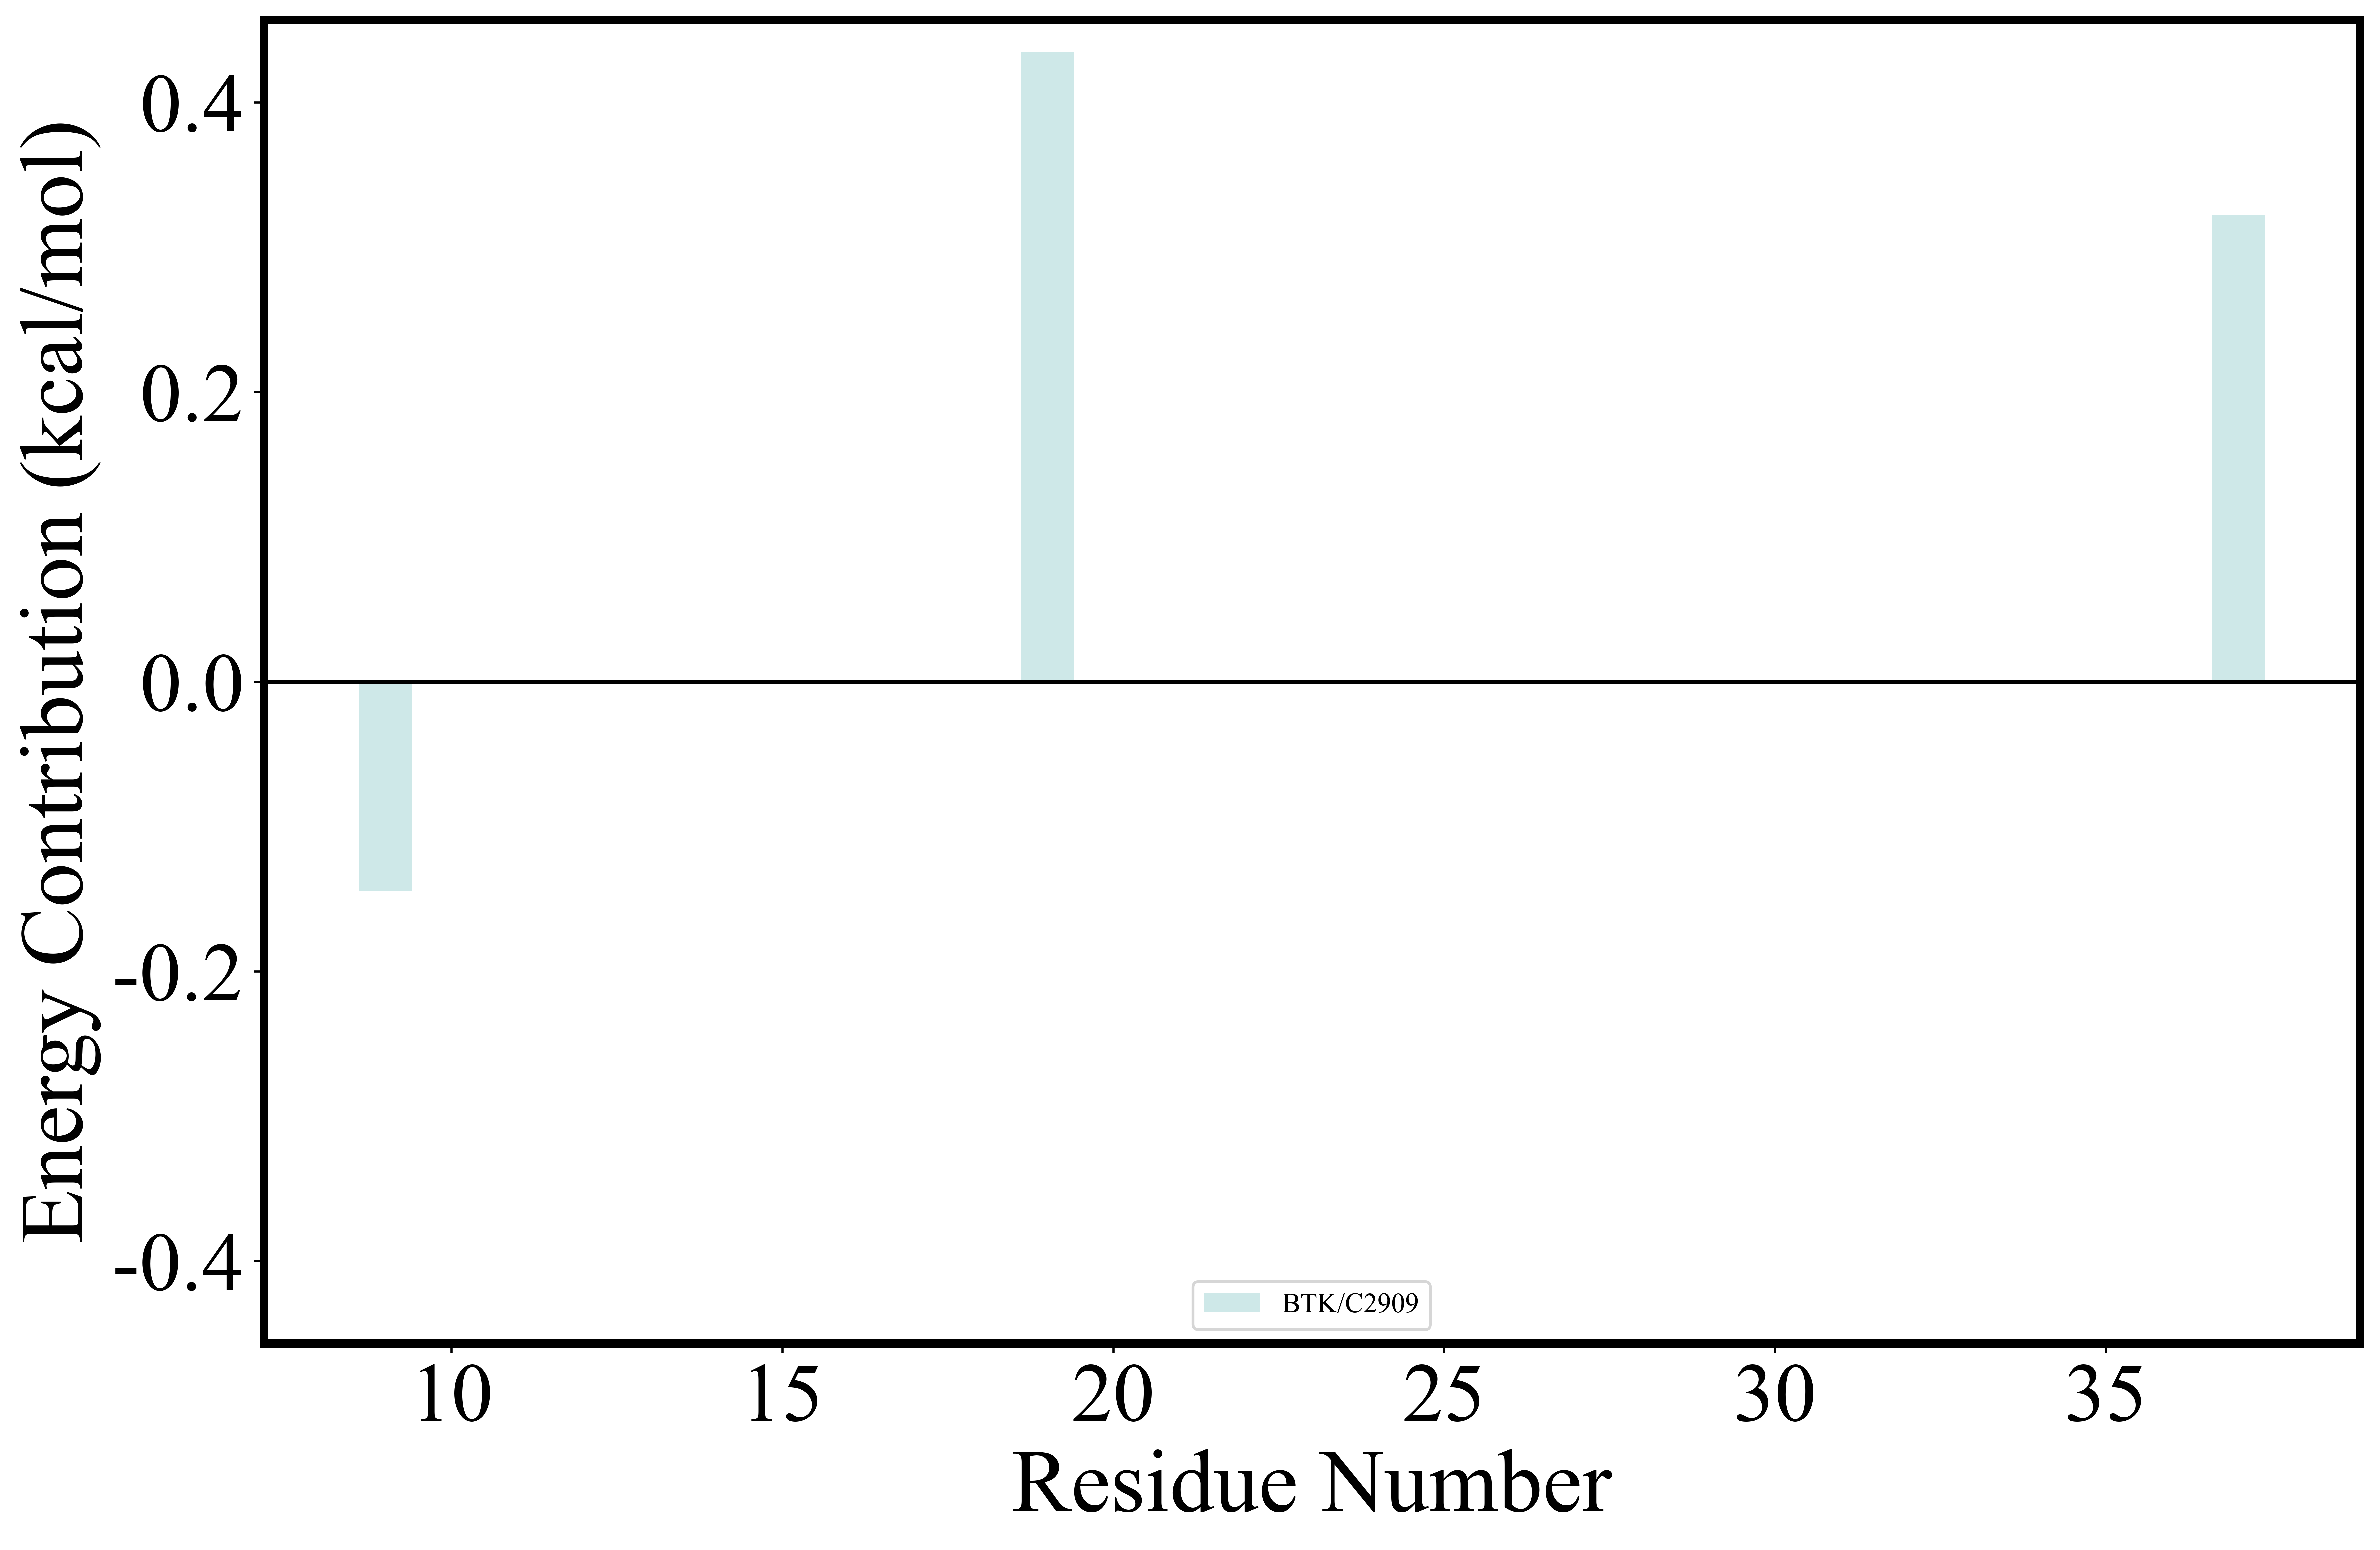

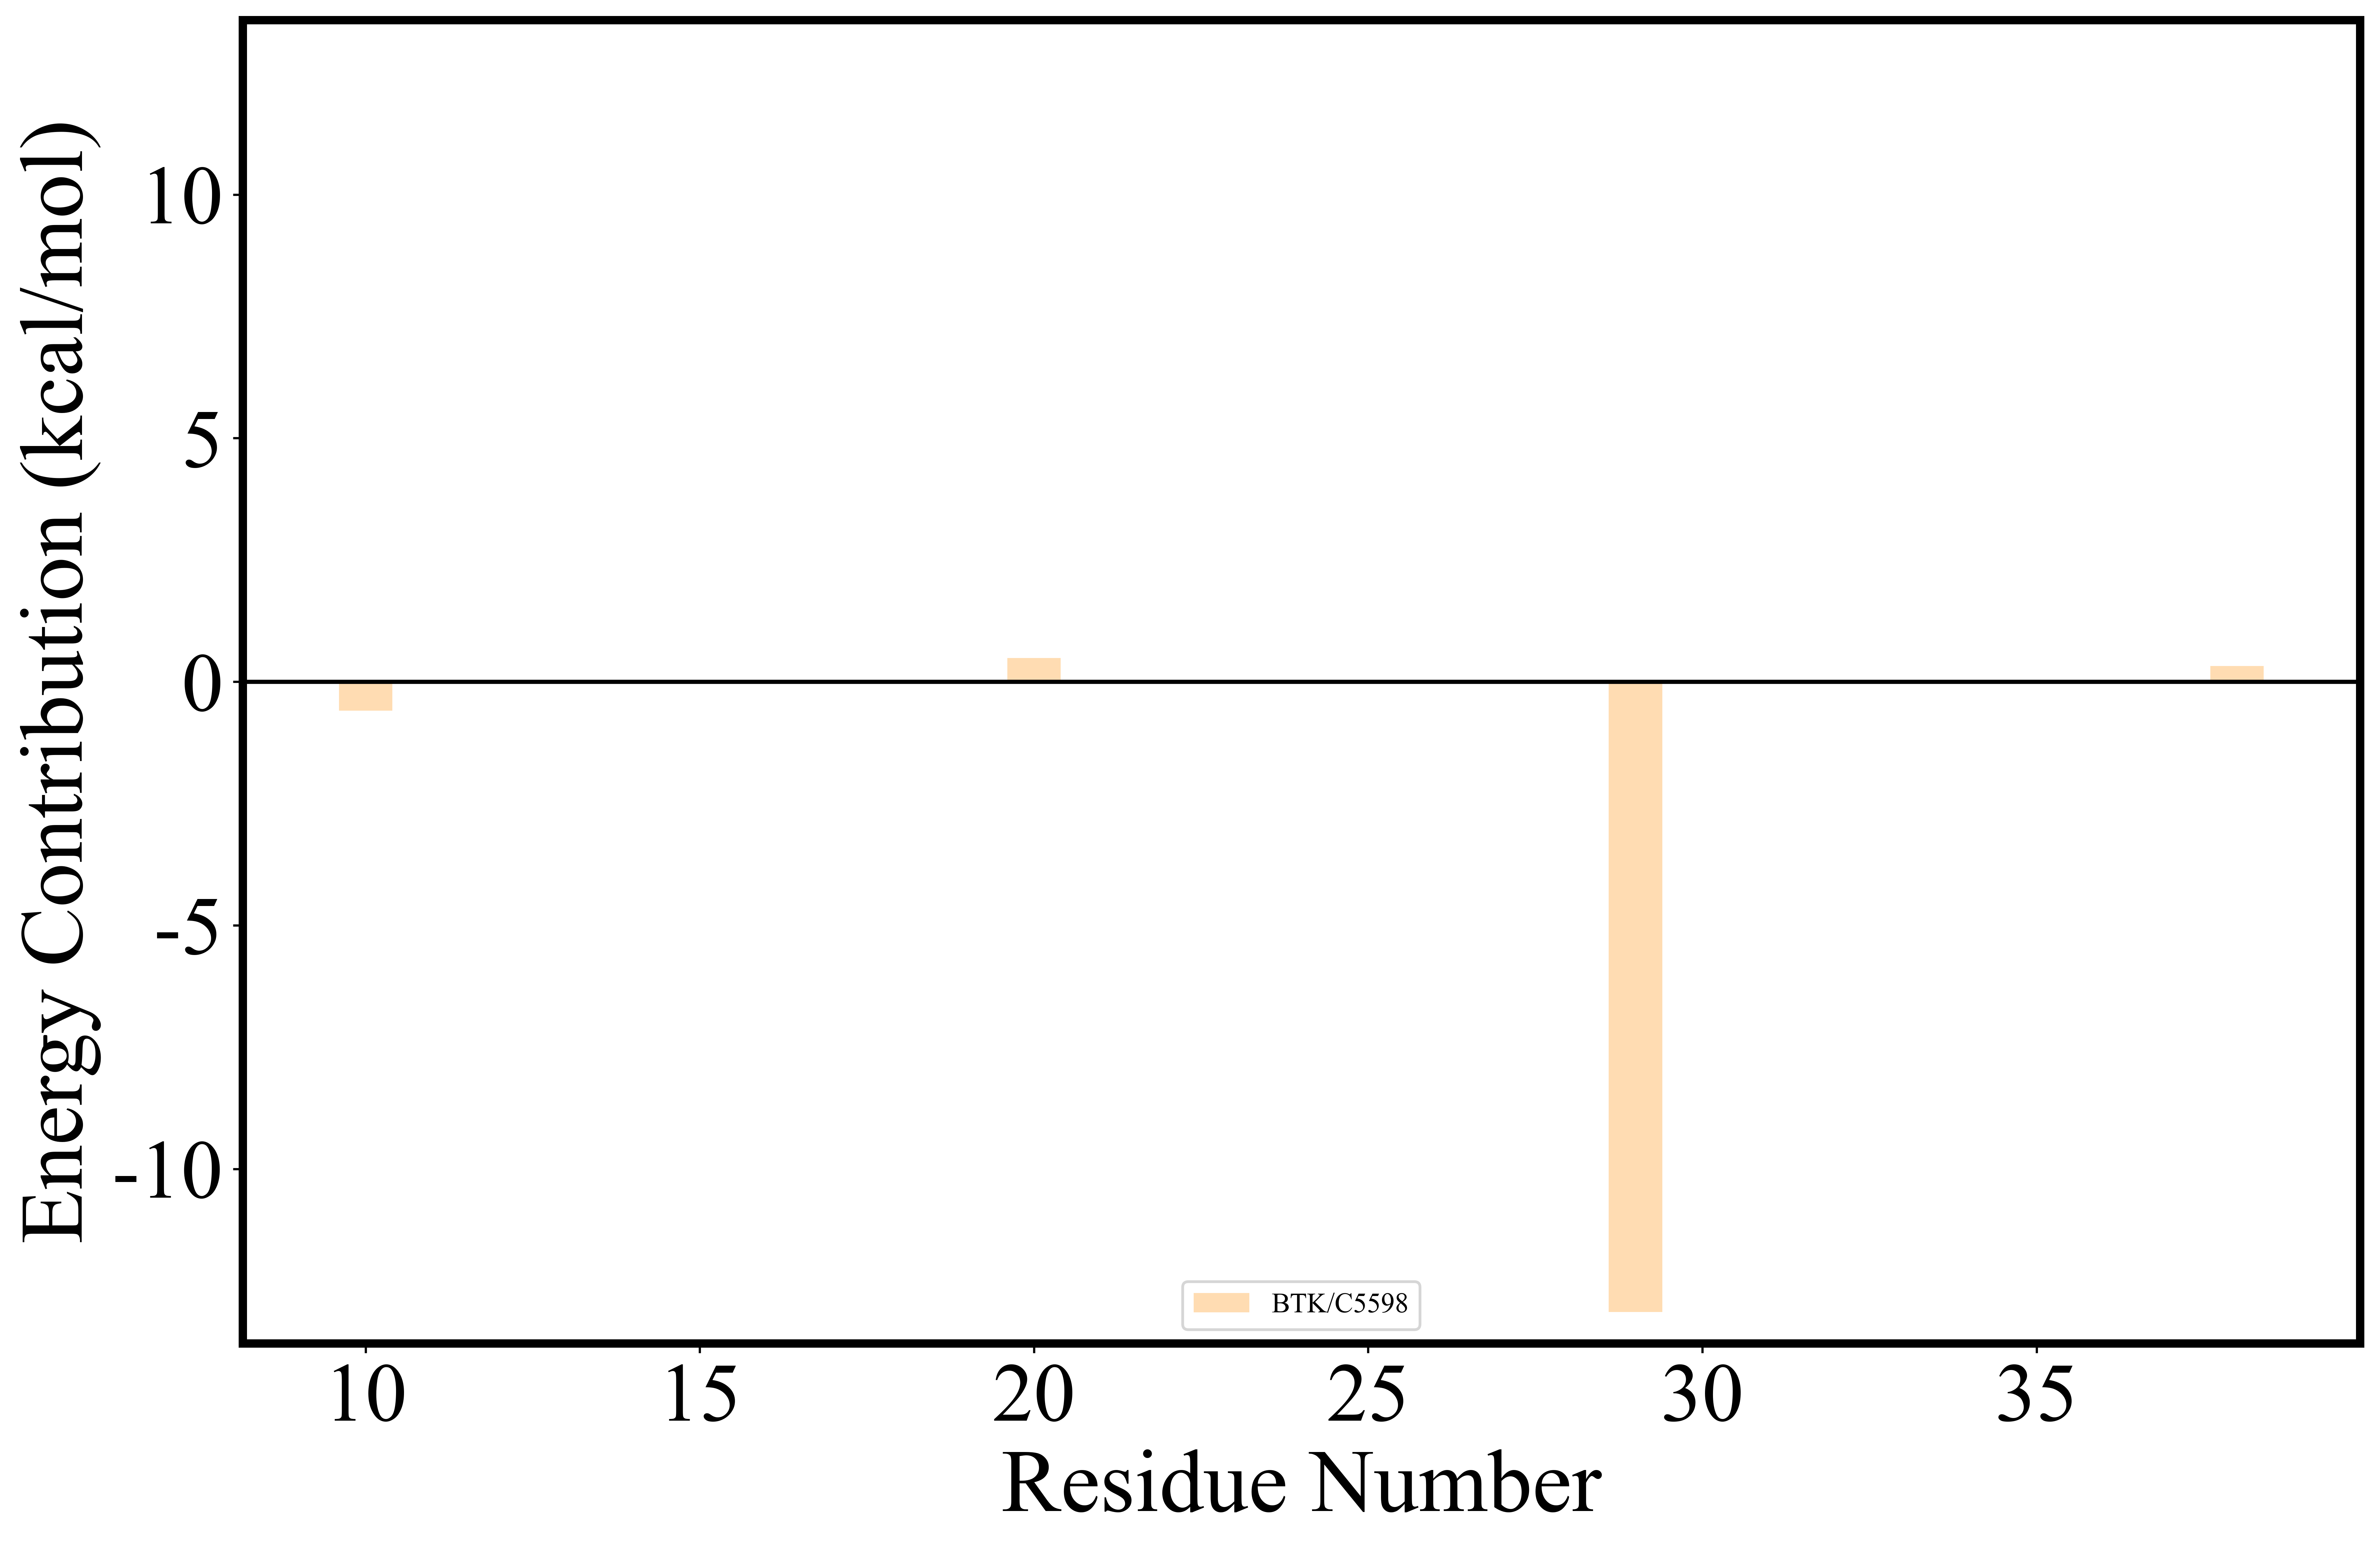

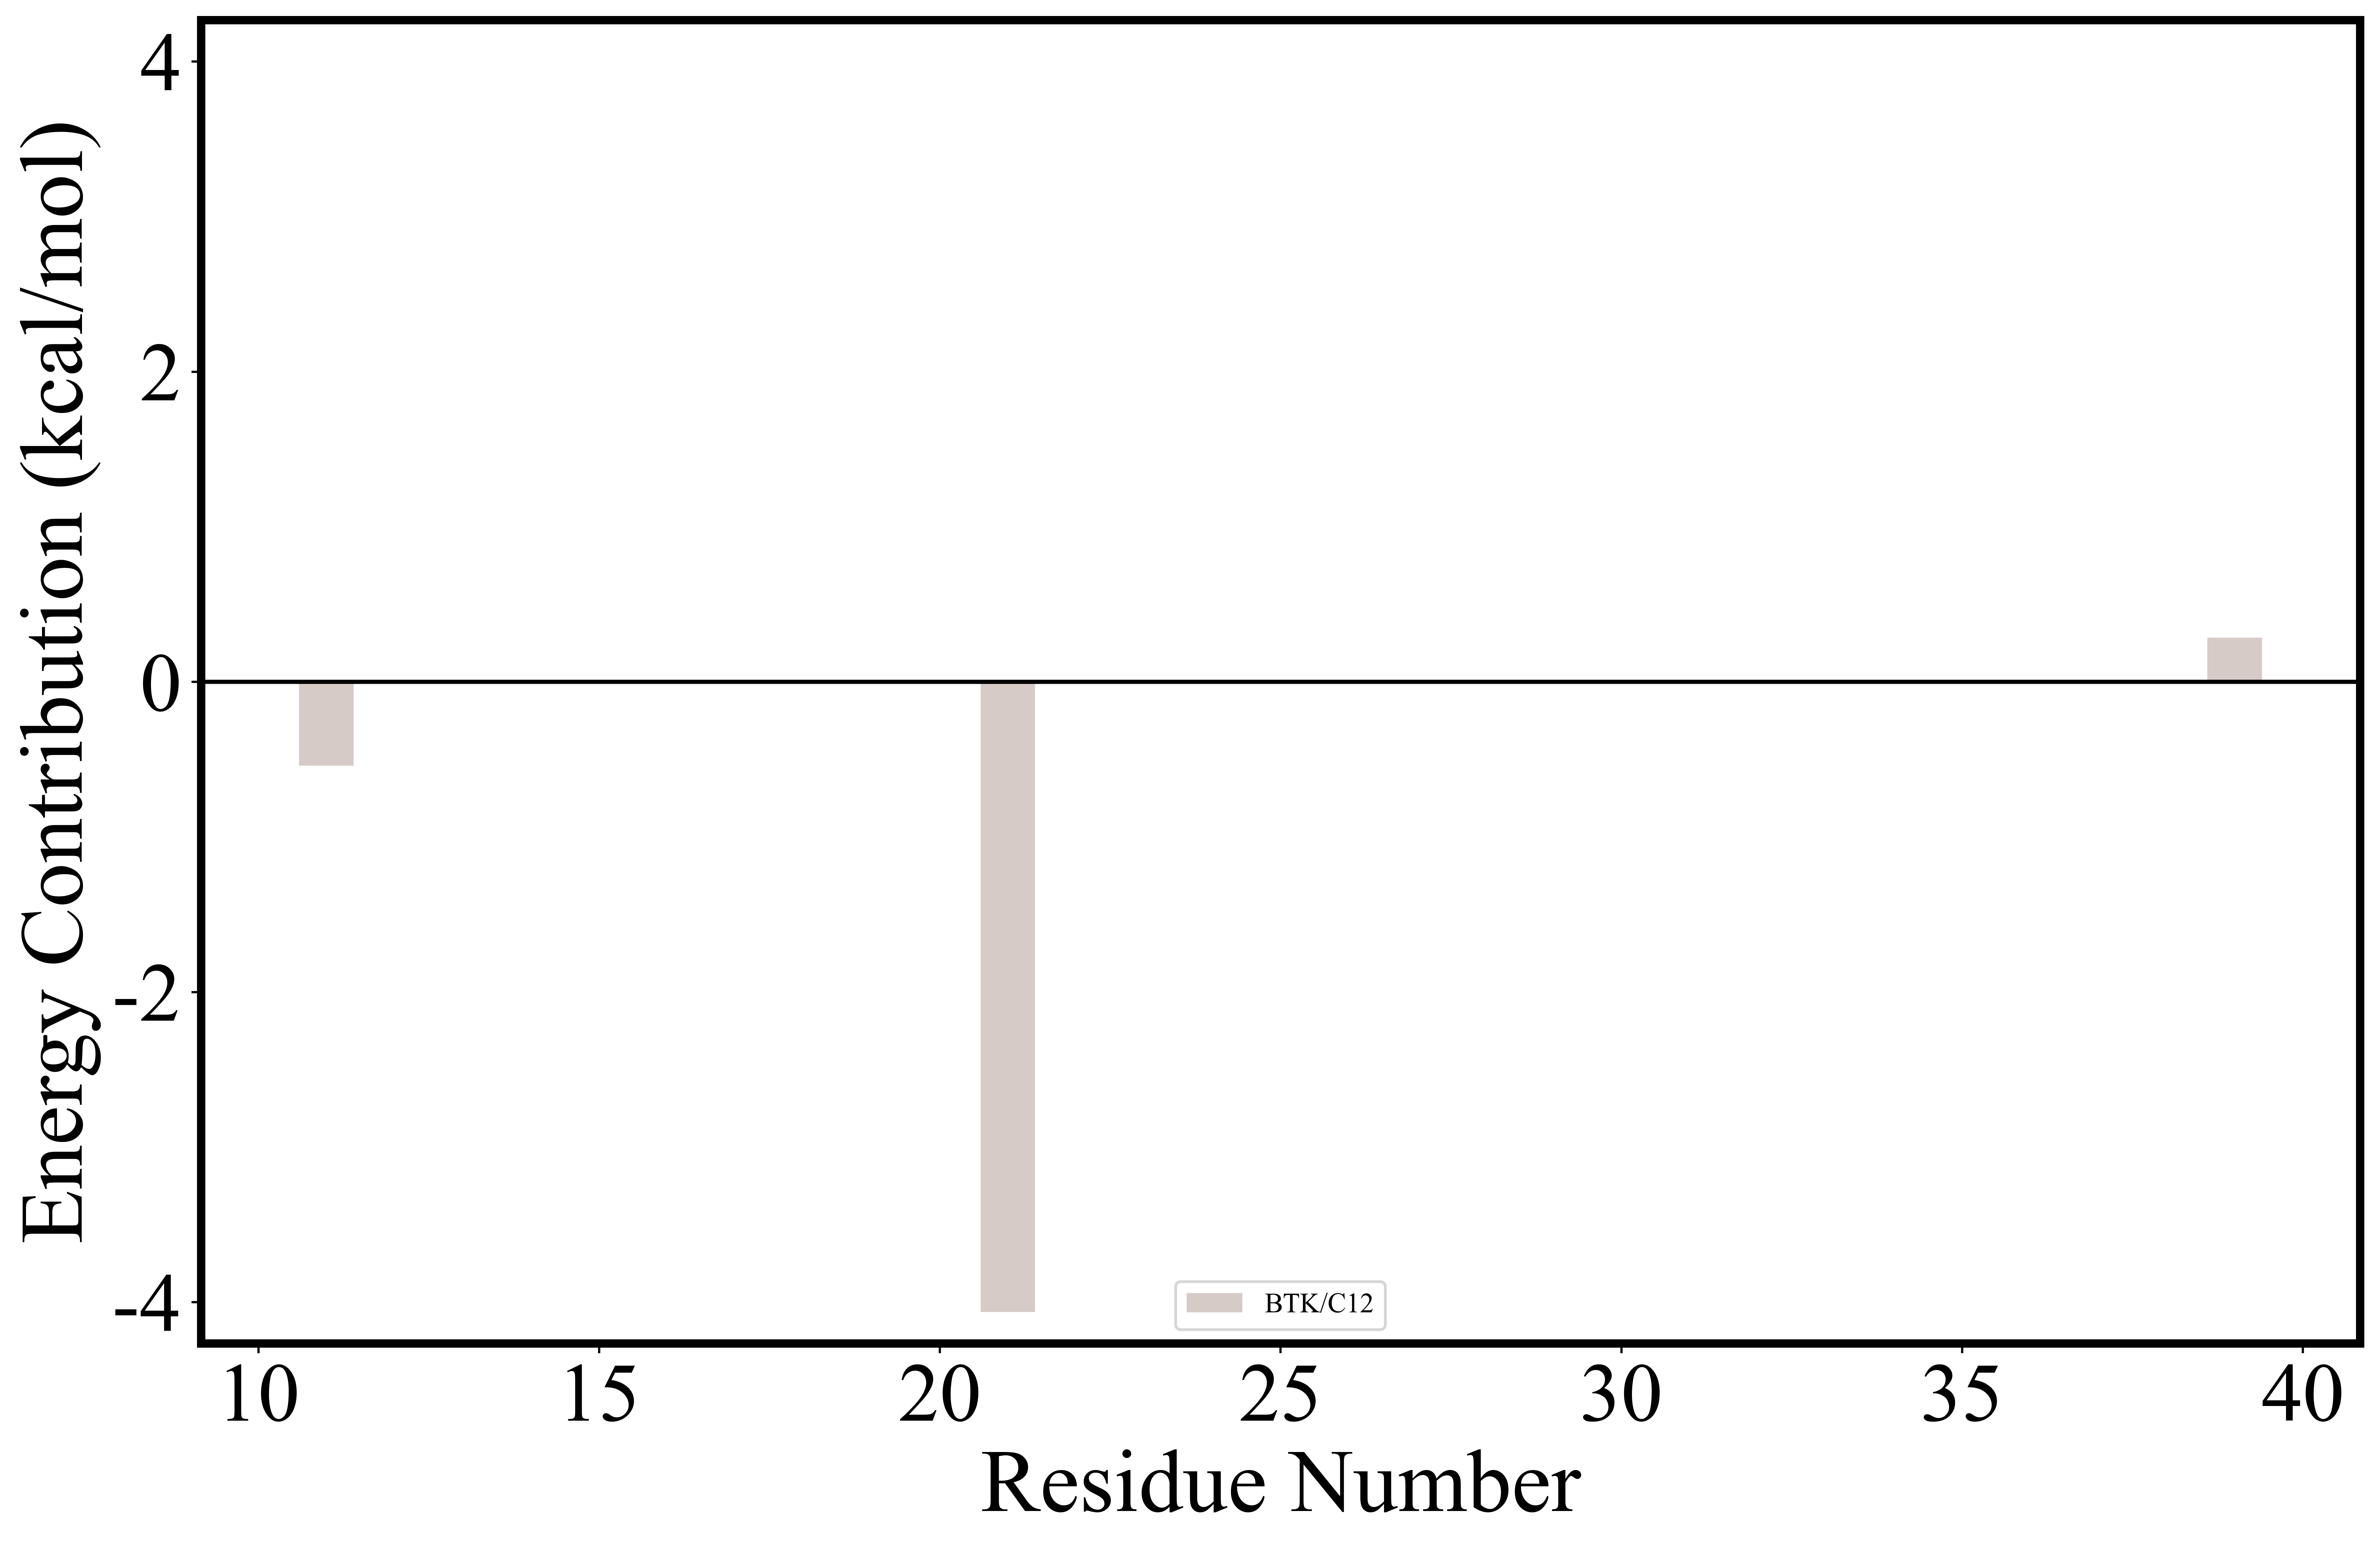

In [17]:
arges.alpha = 0.3
arges.ncol = len(data_dict_)

for key_, item_ in data_dict_.items():
    img_ = DiagramObjects(
        figsize=arges.figsize, 
        fontsize=arges.fontsize, 
        dpi=arges.dpi,
        title=None,
        xlabels=arges.xlabels,
        ylabels=arges.ylabels,
        nrows=arges.nrows, ncols=arges.ncols,
    )

    label_ = item_['display_label']  
    
    upper_lower_bar_chart(
        img_.ax[(0, 0)], 
        item_['labels'], 
        item_['values'], 
        title=None, 
        label=label_,  
        color=colors_[key_],
        alpha=arges.alpha
    )

    img_.ax[(0, 0)].legend(
        loc=arges.loc, 
        ncol=arges.ncol, 
        fontsize=arges.fontsize-4,  
        prop=arges.font,
        #title="BTK Variants",  
        title_fontsize=arges.fontsize-2
    )

    safe_label = label_.replace('/', '_')  
    output_path = os.path.join('../jupyter_draw/imgs', f'BarChart_{safe_label}.png')
    os.makedirs(os.path.dirname(output_path), exist_ok=True)  
    img_.plt.savefig(output_path, dpi=arges.dpi, bbox_inches='tight')

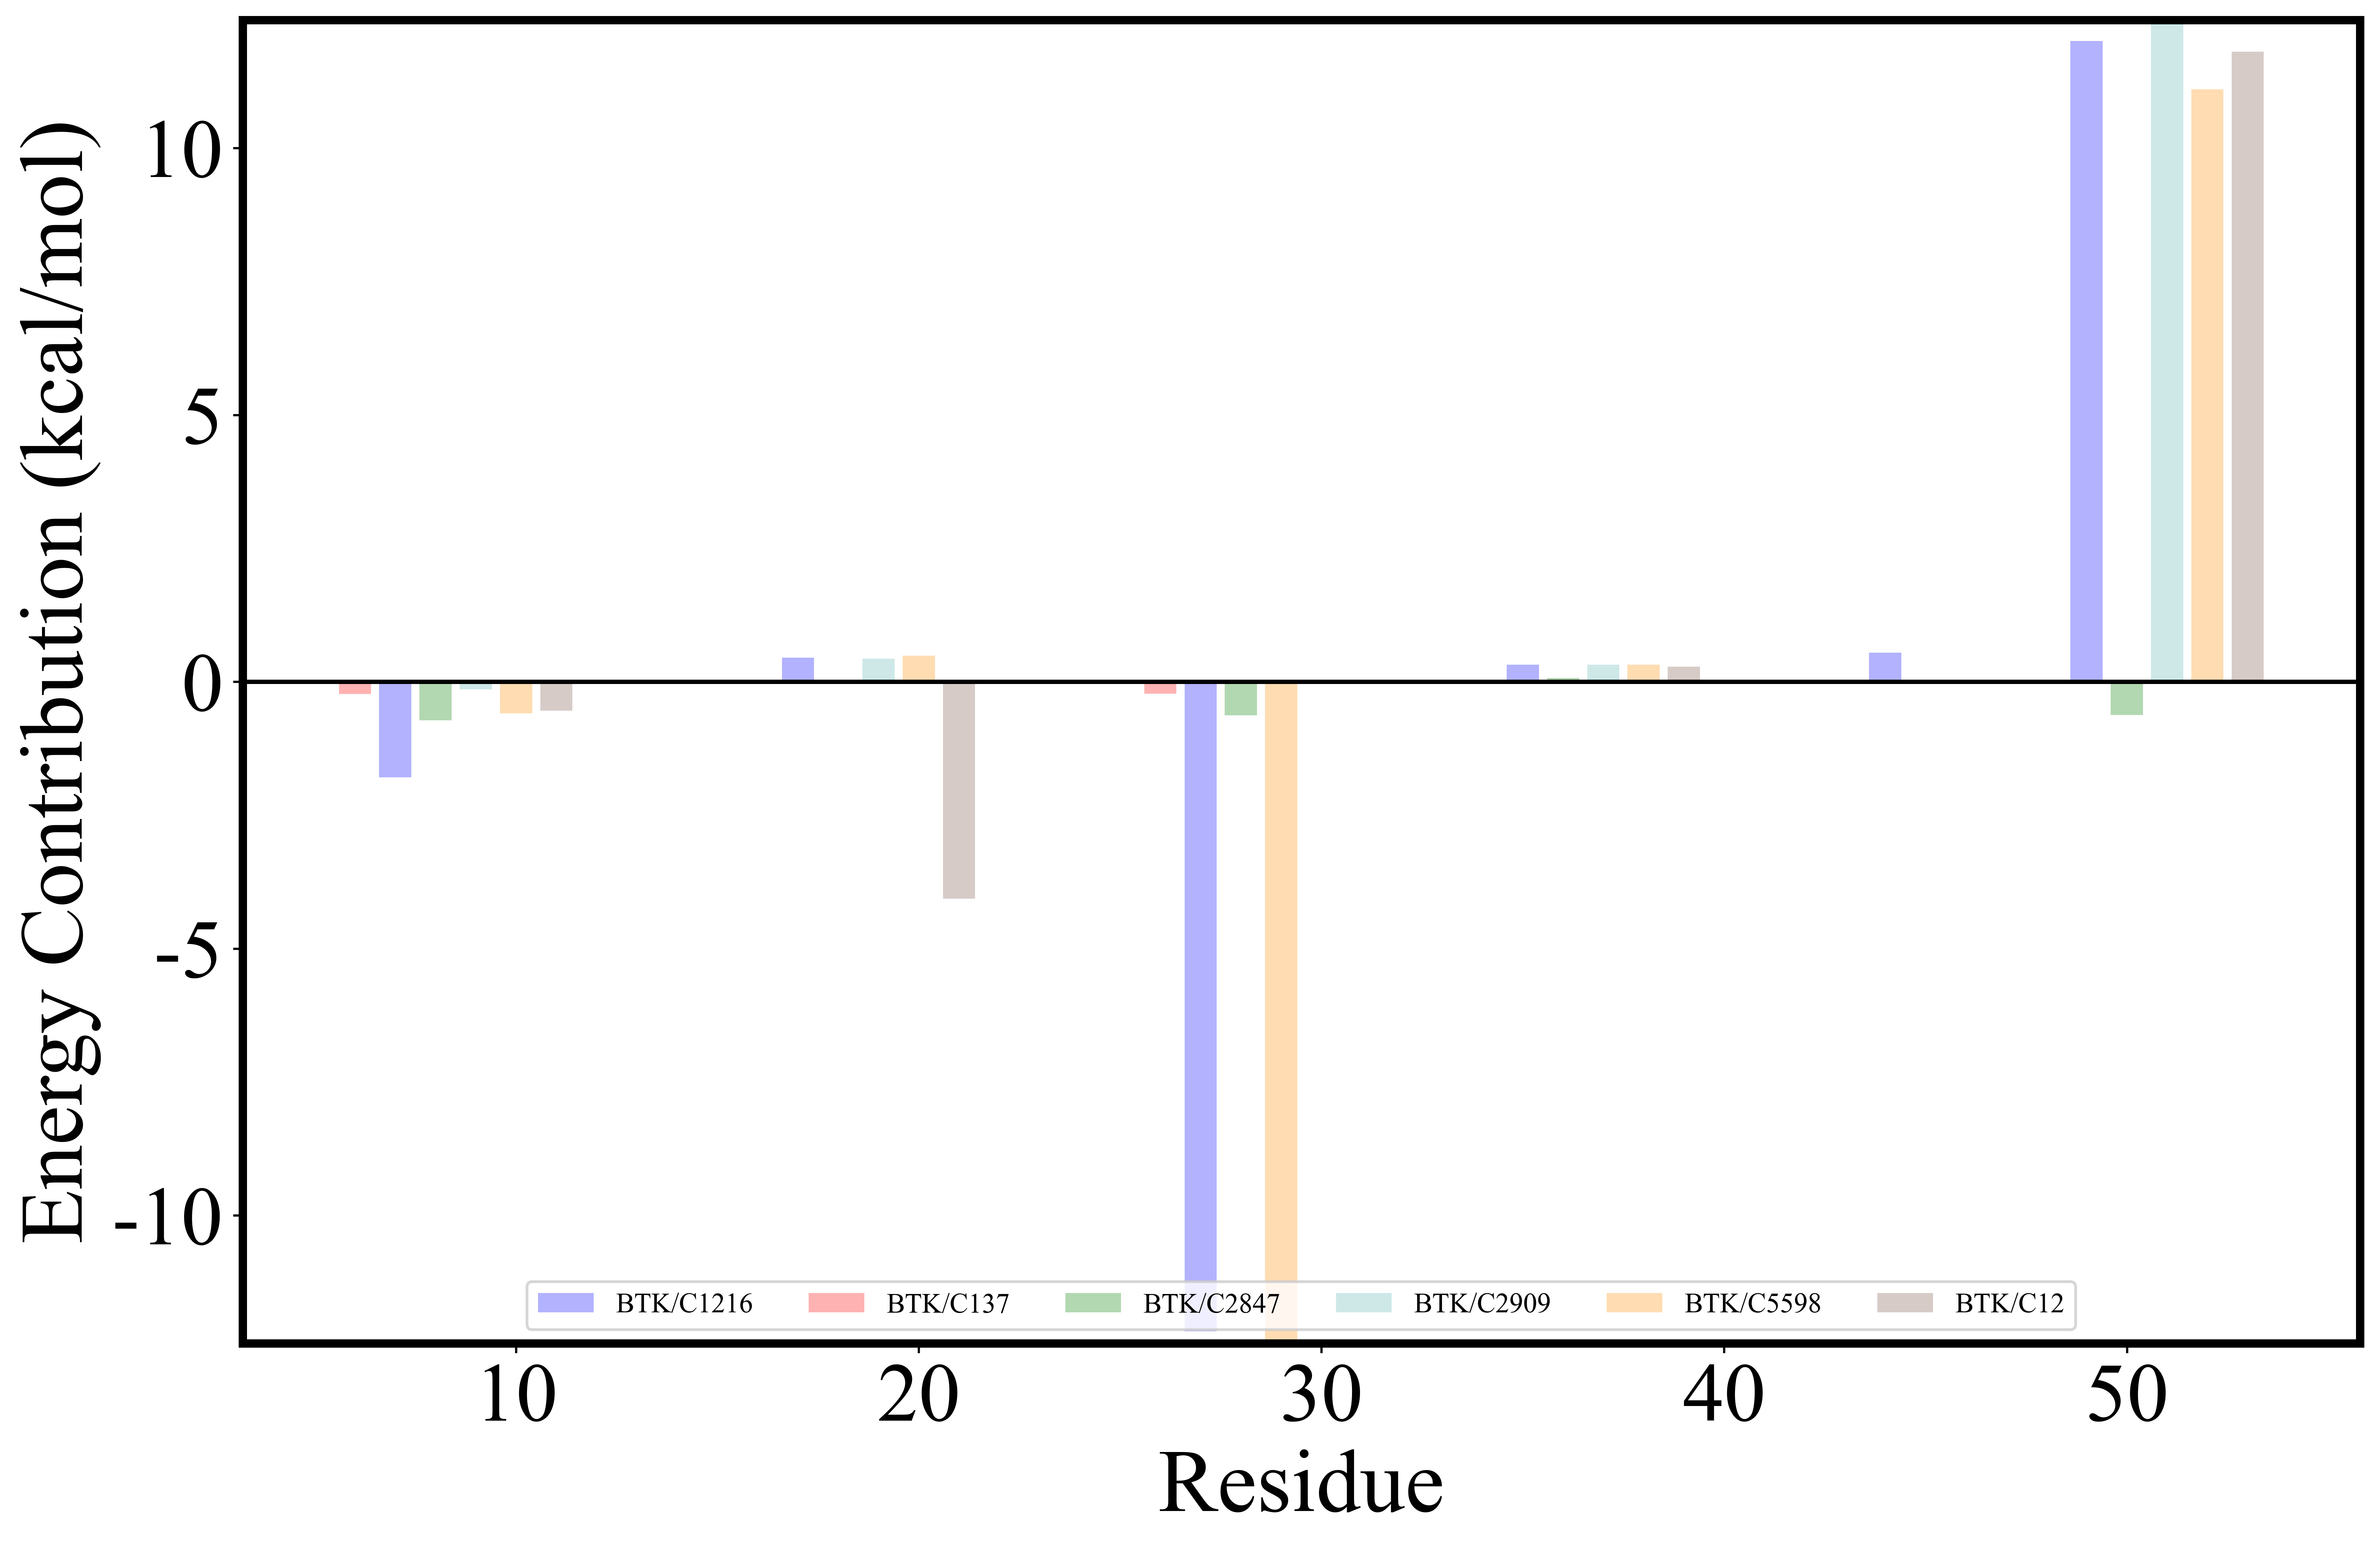

In [9]:
arges.alpha = 0.3  
arges.ncol = len(data_dict_)  

img_ = DiagramObjects(
    figsize=arges.figsize, 
    fontsize=arges.fontsize, 
    dpi=arges.dpi,
    title=None,
    xlabels=arges.xlabels,
    ylabels=arges.ylabels,
    nrows=arges.nrows,
    ncols=arges.ncols,
)

for key_, item_ in data_dict_.items():
    label_ = item_.get('display_label', 'control' if key_ == '对照' else key_)
    upper_lower_bar_chart(
        ax=img_.ax[(0, 0)], 
        labels=item_['labels'], 
        values=item_['values'], 
        title=None, 
        label=label_,
        color=colors_[key_],
        alpha=arges.alpha
    )

img_.ax[(0, 0)].legend(
    loc=arges.loc,
    ncol=arges.ncol,
    fontsize=arges.fontsize - 4, 
    prop=arges.font,
    frameon=True 
)

output_dir = "../jupyter_draw/imgs"
os.makedirs(output_dir, exist_ok=True)
img_.plt.savefig(
    os.path.join(output_dir, "Combined_BarChart.png"),
    dpi=arges.dpi,
    bbox_inches="tight"
)

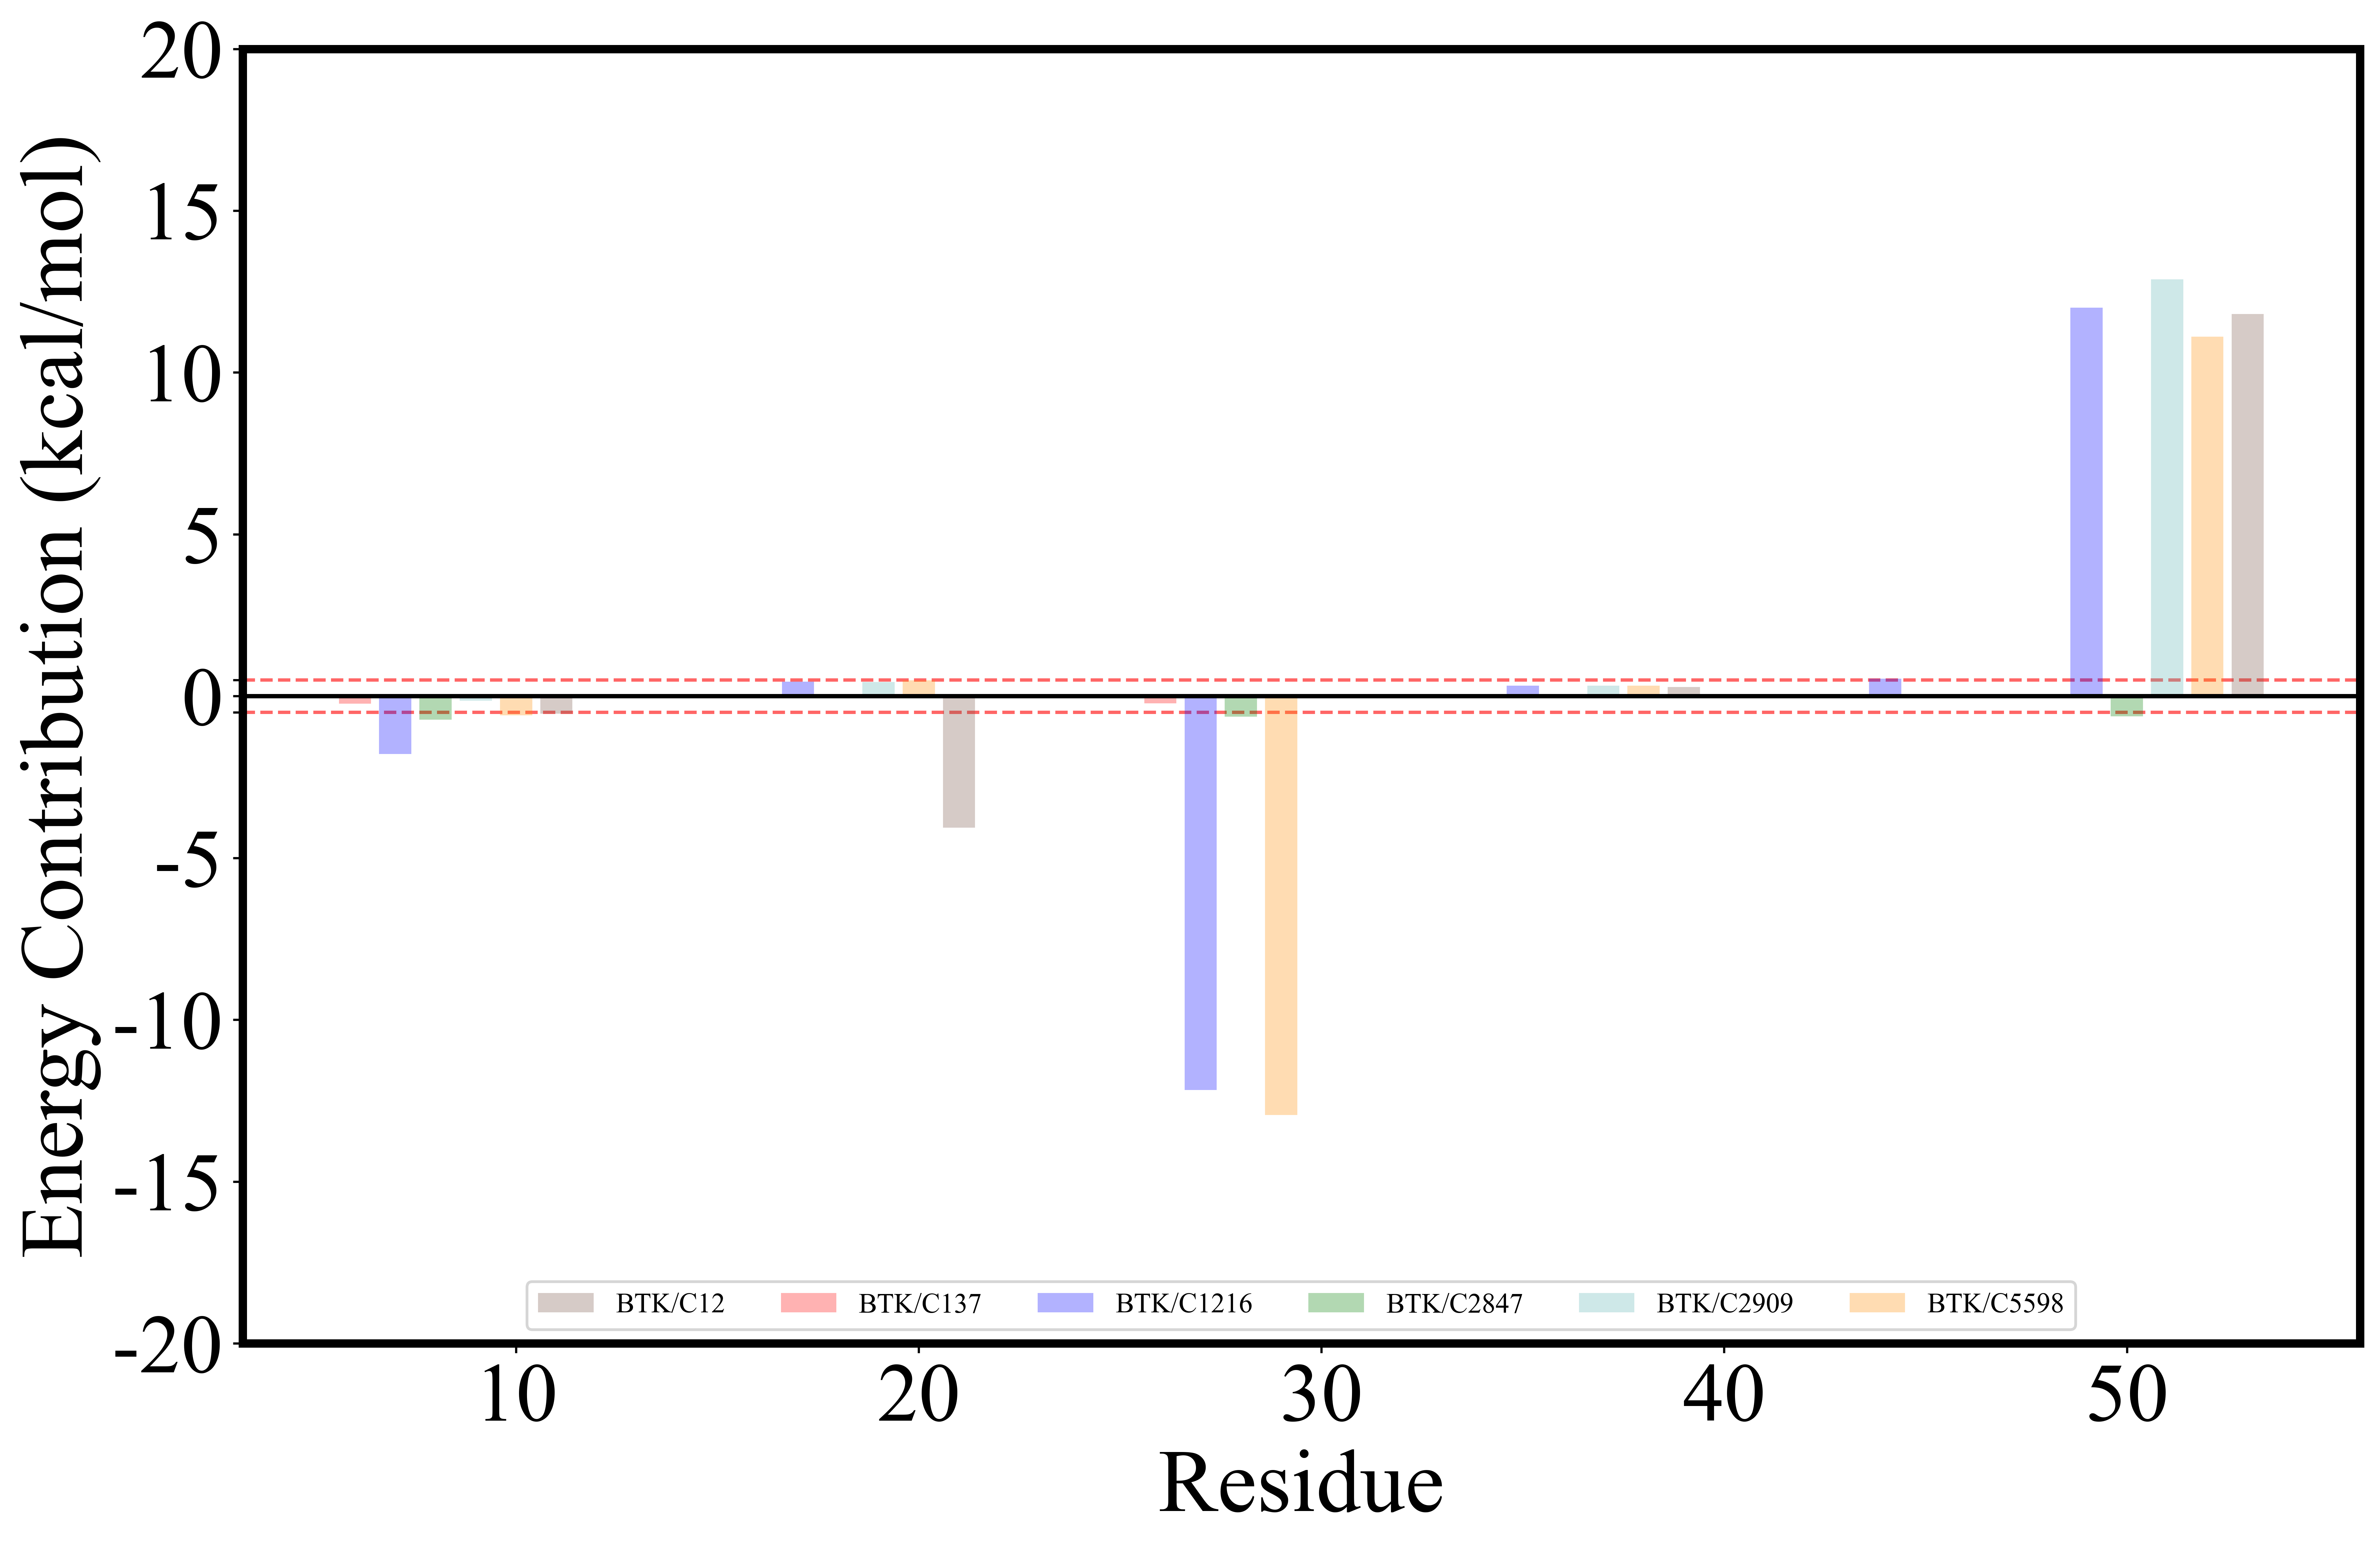

In [10]:
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator

arges.alpha = 0.3
arges.ncol = len(data_dict_)

img_ = DiagramObjects(
    figsize=arges.figsize, 
    fontsize=arges.fontsize, 
    dpi=arges.dpi,
    title=None,
    xlabels=arges.xlabels,
    ylabels=arges.ylabels,
    nrows=arges.nrows,
    ncols=arges.ncols,
)

desired_order = ['对照', '137', '1216', '2847', '2909', '5598']
ordered_keys = [key for key in desired_order if key in data_dict_]

for key_ in ordered_keys:
    item_ = data_dict_[key_]
    label_ = item_.get('display_label', 'control' if key_ == '对照' else key_)
    upper_lower_bar_chart(
        ax=img_.ax[(0, 0)], 
        labels=item_['labels'], 
        values=item_['values'], 
        title=None, 
        label=label_,
        color=colors_[key_],
        alpha=arges.alpha
    )

hline_color = '#FF0000'  
for y_val in [0.5, -0.5]:
    img_.ax[(0, 0)].axhline(
        y=y_val, 
        color=hline_color, 
        linestyle='--', 
        linewidth=1.2,
        alpha=0.6,
        zorder=0 
    )

def format_func(value, tick_number):
    if abs(value - 0.5) < 0.01:  
        return ""  
    elif abs(value + 0.5) < 0.01:  
        return ""
    elif value.is_integer():  
        return f"{int(value)}"
    else:
        return ""  

img_.ax[(0, 0)].yaxis.set_major_formatter(FuncFormatter(format_func))

ymin, ymax = -20, 20
img_.ax[(0, 0)].set_ylim(ymin, ymax)

tick_list = [i for i in range(int(ymin), int(ymax)+1, 5)]

required_ticks = sorted(set(tick_list + [0.5, -0.5]))
img_.ax[(0, 0)].set_yticks(required_ticks)

img_.ax[(0, 0)].legend(
    loc=arges.loc,
    ncol=arges.ncol,
    fontsize=arges.fontsize - 4,
    prop=arges.font,
    frameon=True
)

output_dir = "../jupyter_draw/imgs"
os.makedirs(output_dir, exist_ok=True)
img_.plt.savefig(
    os.path.join(output_dir, "Combined_BarChart_1.png"),
    dpi=arges.dpi,
    bbox_inches="tight"
)

无图例图像已保存至：e:\Kinase_mapping\jupyter_draw\imgs\Combined_BarChart_no_legend_1.png


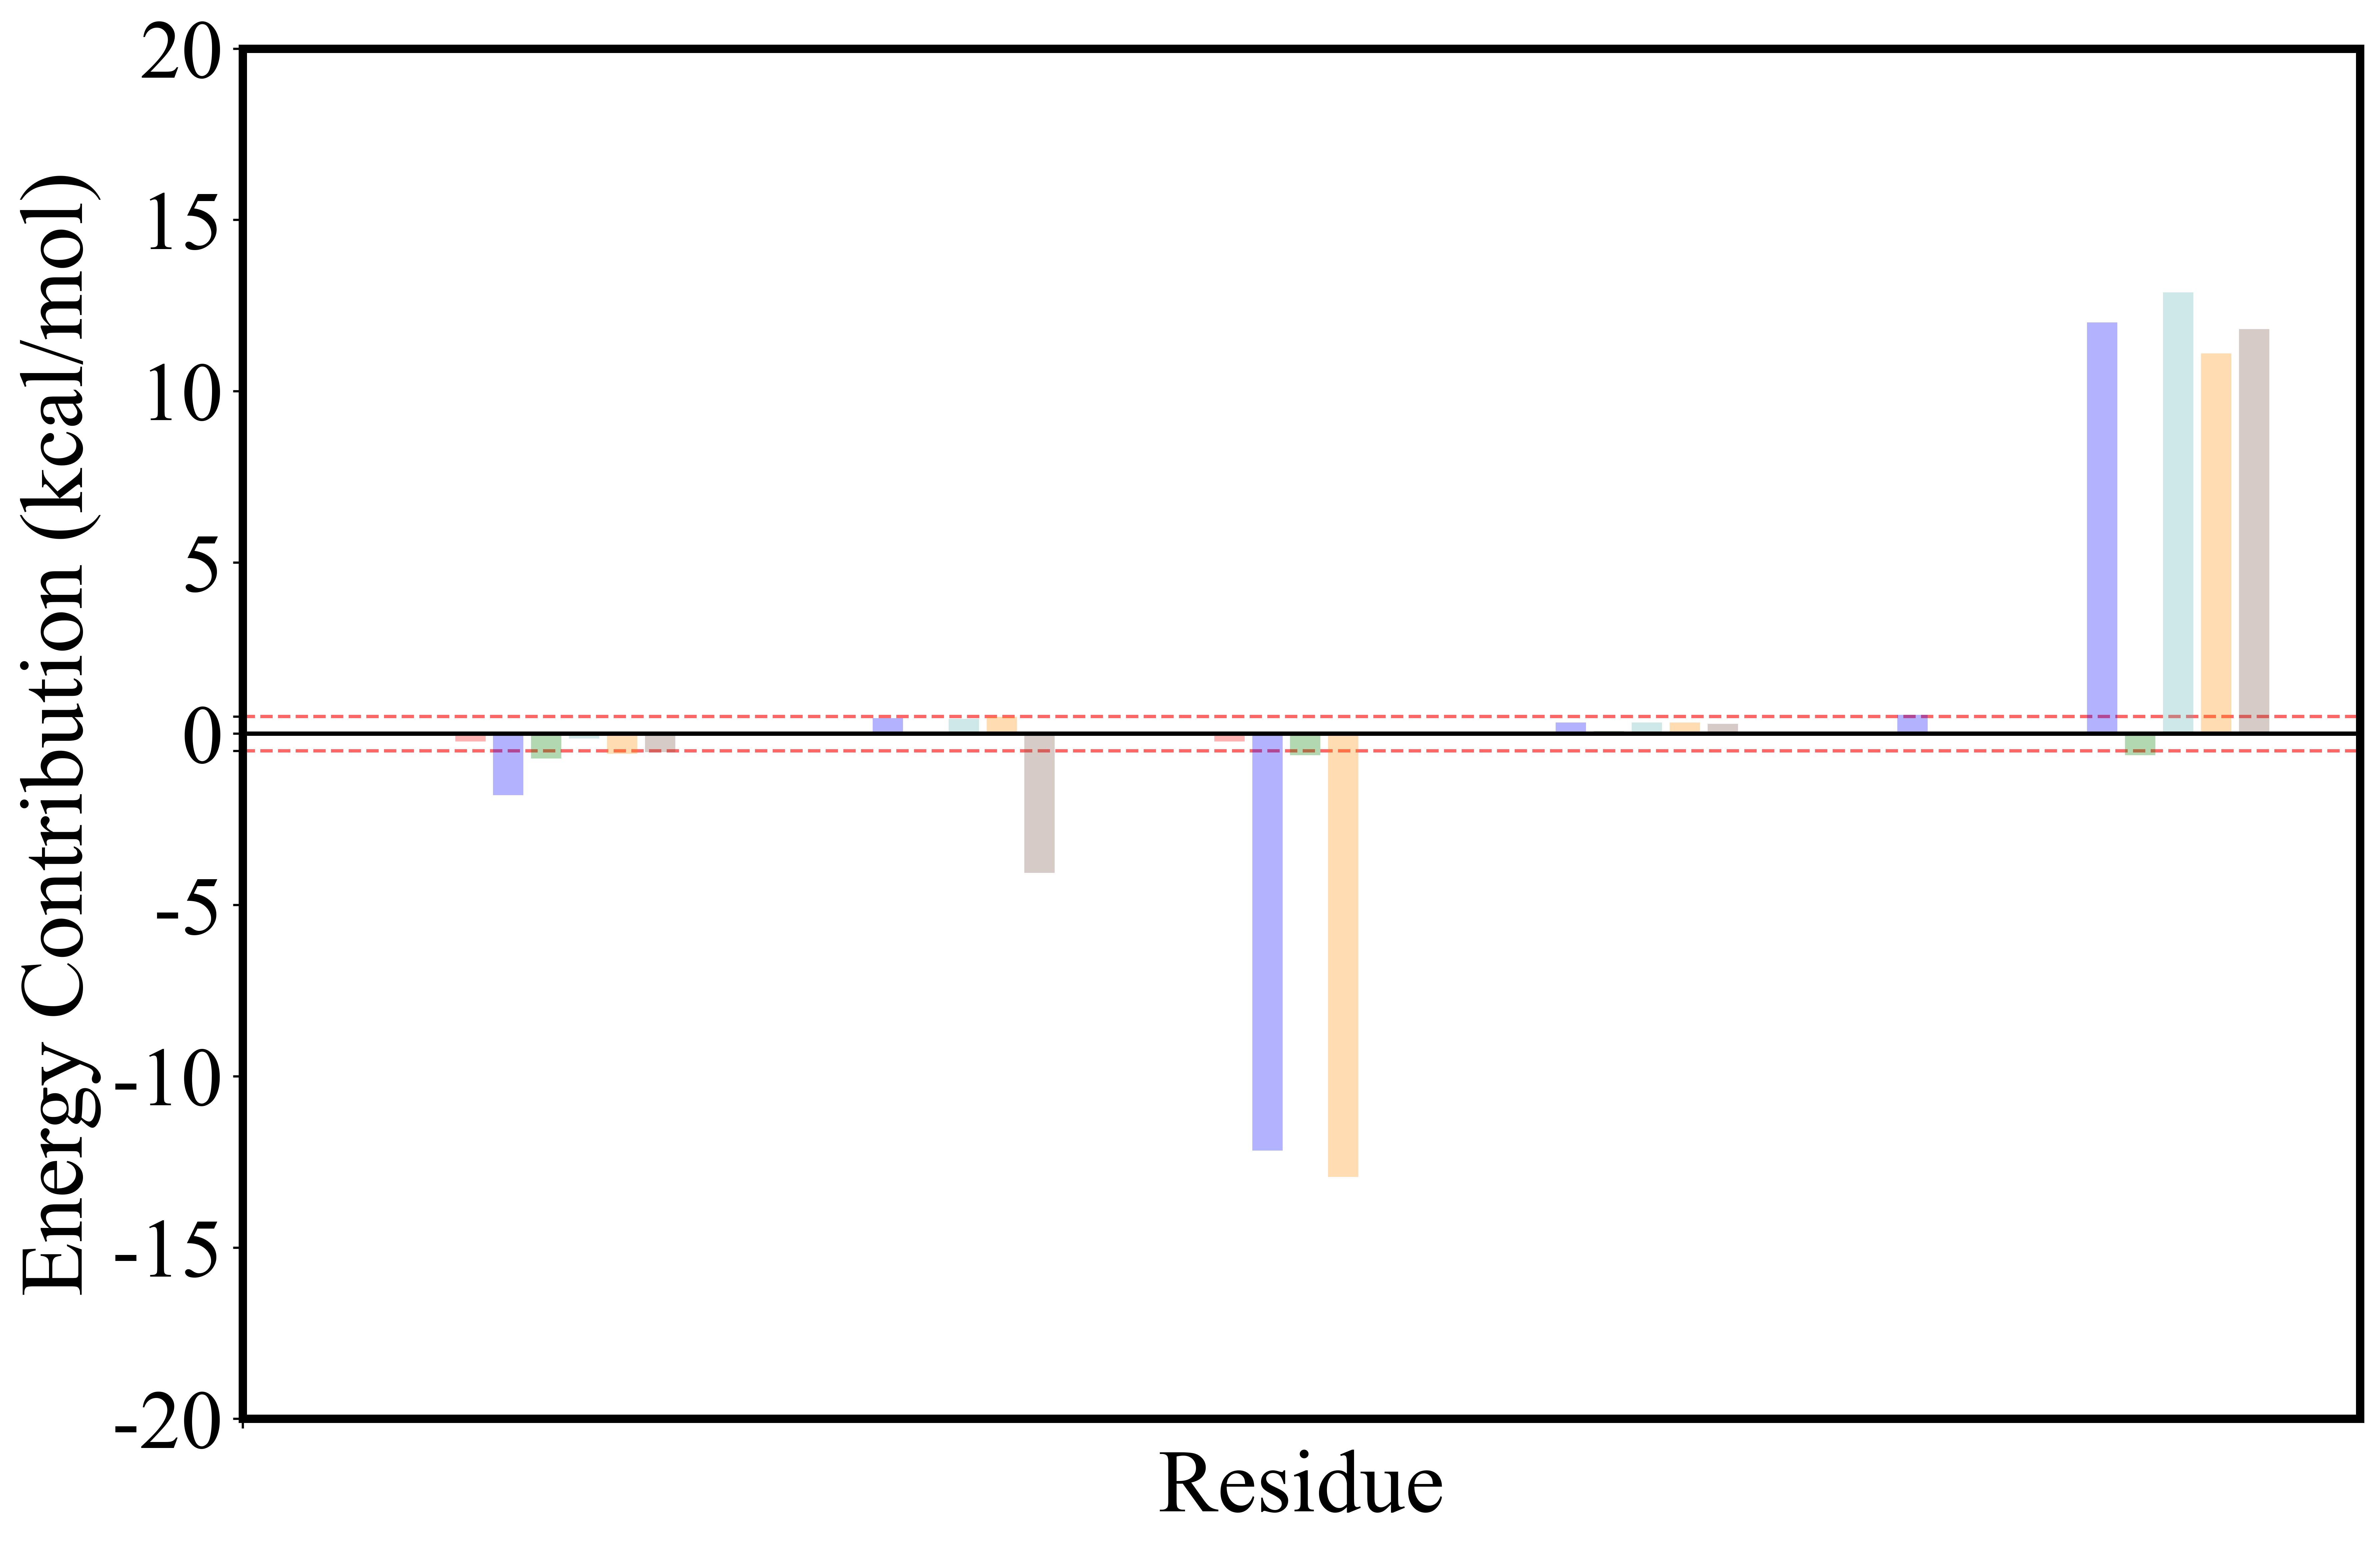

In [13]:
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator

arges.alpha = 0.3
arges.ncol = len(data_dict_)

img_ = DiagramObjects(
    figsize=arges.figsize, 
    fontsize=arges.fontsize, 
    dpi=arges.dpi,
    title=None,
    xlabels=arges.xlabels,
    ylabels=arges.ylabels,
    nrows=arges.nrows,
    ncols=arges.ncols,
)

desired_order = ['对照', '137', '1216', '2847', '2909', '5598']
ordered_keys = [key for key in desired_order if key in data_dict_]

for key_ in ordered_keys:
    item_ = data_dict_[key_]
    upper_lower_bar_chart(
        ax=img_.ax[(0, 0)], 
        labels=item_['labels'], 
        values=item_['values'], 
        title=None, 
        label=None,  
        color=colors_[key_],
        alpha=arges.alpha
    )

hline_color = '#FF0000' 
for y_val in [0.5, -0.5]:
    img_.ax[(0, 0)].axhline(
        y=y_val, 
        color=hline_color, 
        linestyle='--', 
        linewidth=1.2,
        alpha=0.6,
        zorder=0  
    )

def format_func(value, tick_number):
    if abs(value - 0.5) < 0.01:  
        return ""  
    elif abs(value + 0.5) < 0.01:  
        return ""
    elif value.is_integer():  
        return f"{int(value)}"
    else:
        return ""  

img_.ax[(0, 0)].yaxis.set_major_formatter(FuncFormatter(format_func))

ymin, ymax = -20, 20
img_.ax[(0, 0)].set_ylim(ymin, ymax)

tick_list = [i for i in range(int(ymin), int(ymax)+1, 5)]
required_ticks = sorted(set(tick_list + [0.5, -0.5]))
img_.ax[(0, 0)].set_yticks(required_ticks)

current_legend = img_.ax[(0, 0)].get_legend()
if current_legend is not None:
    current_legend.remove()

custom_x_positions = [0]  
custom_x_ticks = ['']  

img_.ax[(0, 0)].set_xticks(custom_x_positions)
img_.ax[(0, 0)].set_xticklabels(custom_x_ticks)

output_dir = "../jupyter_draw/imgs"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "Combined_BarChart_no_legend_1.png")
img_.plt.savefig(
    output_path,
    dpi=arges.dpi,
    bbox_inches="tight"
)